## Imports

In [1]:
import pandas as pd

from utility_processing import (
    quitar_asterisco,
    crear_lista_diccionarios,
    plot_metric,
    comparar_metricas,
    crear_datagramas_filtrados,
    crear_tabla_comparativa_para_formatos,
    crear_tabla_comparativa_para_modelos_yolo,
    crear_tabla_promedios_modelos_yolo,
    crear_tabla_promedios_dataset
)

In [2]:
results_path_1 = "training/results_1.csv"
results_path_2 = "training/results_2.csv"

# Read both CSV files
df1 = pd.read_csv(results_path_1)   # Datos para Deepfish
df2 = pd.read_csv(results_path_2)   # Datos para Deepfish_LO

# Concatenate them into a single DataFrame
df = pd.concat([df1, df2], ignore_index=True)

In [3]:
# Lista de modelos
modelos_yolov8 = ["yolov8n-seg", "yolov8n-seg*" "yolov8s-seg", "yolov8s-seg*", "yolov8m-seg",
                  "yolov8m-seg*", "yolov8l-seg", "yolov8l-seg*", "yolov8x-seg", "yolov8x-seg*"]
modelos_yolov9 = ["yolov9c-seg", "yolov9c-seg*", "yolov9e-seg", "yolov9e-seg*"]
modelos_yolo11 = ["yolo11n-seg", "yolo11n-seg*", "yolo11s-seg", "yolo11s-seg*", "yolo11m-seg",
                  "yolo11m-seg*", "yolo11l-seg", "yolo11l-seg*", "yolo11x-seg", "yolo11x-seg*"]

# Lista de modelos sin transfer learning
modelos_fl = ["yolov8n-seg", "yolov8s-seg","yolov8m-seg", "yolov8l-seg", "yolov8x-seg",
              "yolov9c-seg","yolov9e-seg", "yolo11n-seg", "yolo11s-seg", "yolo11m-seg",
              "yolo11l-seg", "yolo11x-seg"]

# Lista de modelos con transfer learning
modelos_tl = ["yolov8n-seg*", "yolov8s-seg*","yolov8m-seg*", "yolov8l-seg*", "yolov8x-seg*",
              "yolov9c-seg*","yolov9e-seg*","yolo11n-seg*", "yolo11s-seg*", "yolo11m-seg*",
              "yolo11l-seg*", "yolo11x-seg*"]

# Lista de ordenes
orden_yolov8 = ["yolov8n-seg", "yolov8s-seg", "yolov8m-seg", "yolov8l-seg", "yolov8x-seg"]
orden_yolov9 = ["yolov9c-seg", "yolov9e-seg"]
orden_yolo11 = ["yolo11n-seg", "yolo11s-seg", "yolo11m-seg", "yolo11l-seg", "yolo11x-seg"]
models_by_size = ["yolo11n-seg", "yolov8n-seg", "yolo11s-seg", "yolov8s-seg", "yolo11m-seg", "yolov8m-seg",
                  "yolov9c-seg", "yolo11l-seg", "yolov8l-seg", "yolov9e-seg", "yolo11x-seg", "yolov8x-seg"]
model_by_version = ["yolov8n-seg", "yolov8s-seg", "yolov8m-seg", "yolov8l-seg", "yolov8x-seg", "yolov9c-seg",
                    "yolov9e-seg", "yolo11n-seg", "yolo11s-seg", "yolo11m-seg", "yolo11l-seg", "yolo11x-seg"]

# Comparar datos

## Comparar según tamaño de modelo
Acá se busca ver que efecto tiene el tamaño del modelo en la calidad del mismo, además se trata de ver el efecto del uso de Transfer Learning (congelar capas al momento de entrenar). Para esto se agrupan los datos según su versión: YOLOv8, YOLOv9 y YOLOv11. Además se exluyen los casos de modelos exportados (Format != Pytorch). Se pueden analizar los modelos enternados con Transfer Learning, sin Transfer Learning o ambos juntos.

### Creamos los diferentes datagramas a usar

In [4]:
# Datagrama solo con casos en formato Pytorch
df_pytorch = df[df["Format"].isin(["Pytorch"])].copy()
df_tensor32 = df[df["Format"].isin(["TensorRT-F32"])].copy()
df_tensor16 = df[df["Format"].isin(["TensorRT-F16"])].copy()
df_tensor8 = df[df["Format"].isin(["TensorRT-INT8"])].copy()

# Con Transfer Learning
df_pytorch_tl = quitar_asterisco(df_pytorch, modelos_tl)
df_tensor8_tl = quitar_asterisco(df_tensor8, modelos_tl)
# Sin Transfer Learning
df_pytorch_fl = quitar_asterisco(df_pytorch, modelos_fl)
df_tensor8_fl = quitar_asterisco(df_tensor8, modelos_fl)
# Ambos casos
df_pytorch_tt = quitar_asterisco(df_pytorch, modelos_tl+modelos_fl)
df_tensor32_tt = quitar_asterisco(df_tensor32, modelos_tl+modelos_fl)
df_tensor16_tt = quitar_asterisco(df_tensor16, modelos_tl+modelos_fl)
df_tensor8_tt = quitar_asterisco(df_tensor8, modelos_tl+modelos_fl)

# Versiones sin outliers
df_pytorch_tt_thr = df_pytorch_tt[df_pytorch_tt["F1_score(M)"] >= 0.6]
df_pytorch_fl_thr = df_pytorch_fl[df_pytorch_fl["F1_score(M)"] >= 0.6]
df_pytorch_tl_thr = df_pytorch_tl[df_pytorch_tl["F1_score(M)"] >= 0.6]
df_tensor32_tt_thr = df_tensor32_tt[df_tensor32_tt["F1_score(M)"] >= 0.6]
df_tensor16_tt_thr = df_tensor16_tt[df_tensor16_tt["F1_score(M)"] >= 0.6]
df_tensor8_tt_thr = df_tensor8_tt[df_tensor8_tt["F1_score(M)"] >= 0.6]
df_tensor8_fl_thr = df_tensor8_fl[df_tensor8_fl["F1_score(M)"] >= 0.6]
df_tensor8_tl_thr = df_tensor8_tl[df_tensor8_tl["F1_score(M)"] >= 0.6]

# Otros más
df_fl = quitar_asterisco(df, modelos_fl)
df_fl["TransferLearning"] = False 
df_tl = quitar_asterisco(df, modelos_tl)
df_tl["TransferLearning"] = True

df_updated = pd.concat([df_fl, df_tl])
df_updated["Model"] = df_updated["Model"].str.replace("*", "", regex=False)

In [5]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_pytorch_tl_thr, df_pytorch_fl_thr]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]

### Por Modelo

#### YOLOv8

In [6]:
order = orden_yolov8
label = ["YOLOv8"]
plot_dict_yolov8 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

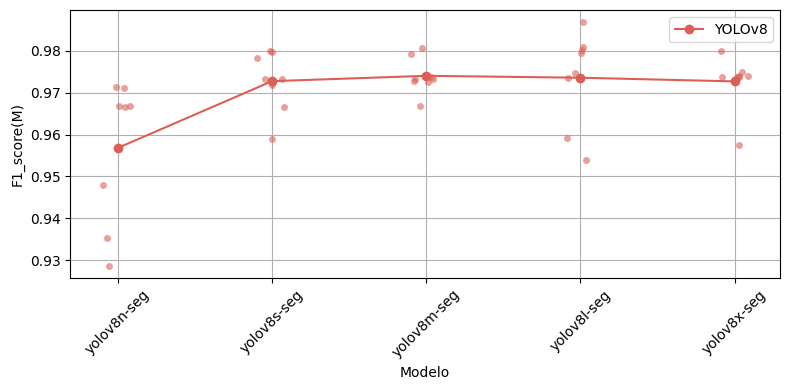

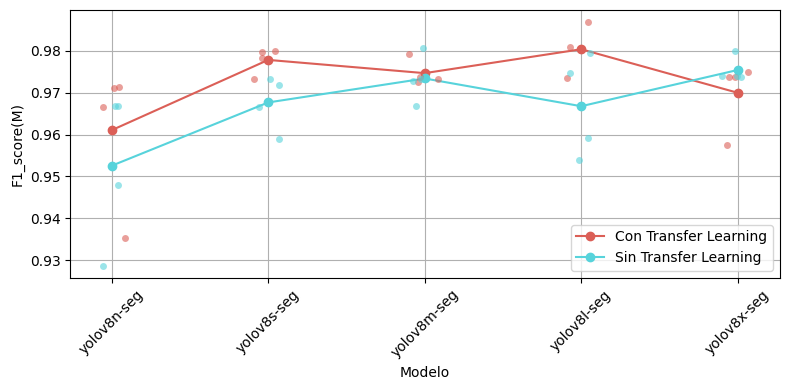

In [7]:
figuras_yolov8_f1score = [plot_metric(**plot_dict_yolov8[0]), plot_metric(**plot_dict_yolov8[1])]

##### mAP50(M)

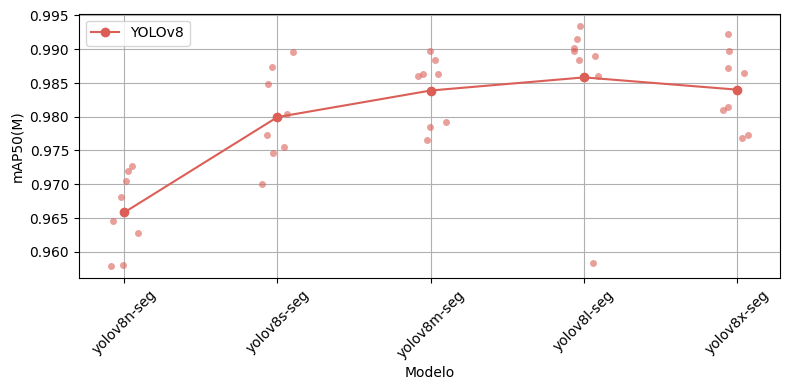

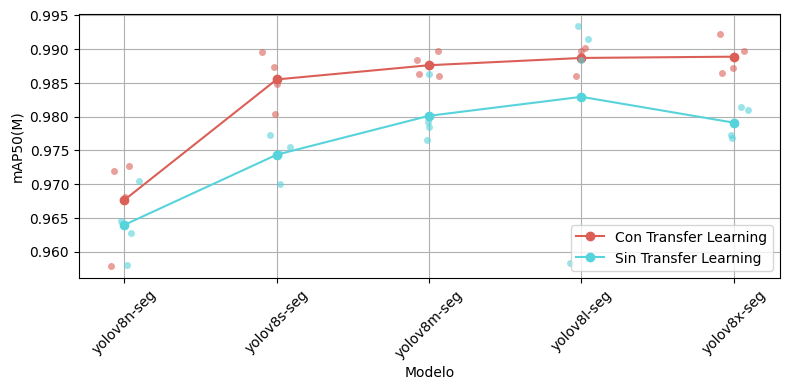

In [8]:
figuras_yolov8_map50 = [plot_metric(**plot_dict_yolov8[2]), plot_metric(**plot_dict_yolov8[3])]

##### mAP50-95(M)

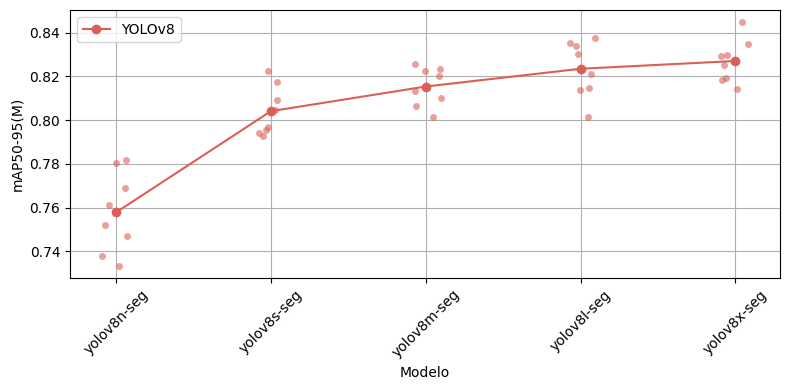

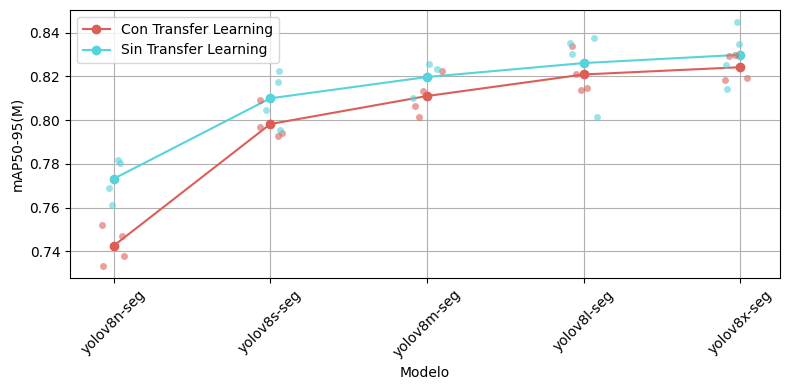

In [9]:
figuras_yolov8_map5095 = [plot_metric(**plot_dict_yolov8[4]), plot_metric(**plot_dict_yolov8[5])]

#### YOLOv9

In [10]:
order = orden_yolov9
label = ["YOLOv9"]

plot_dict_yolov9 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

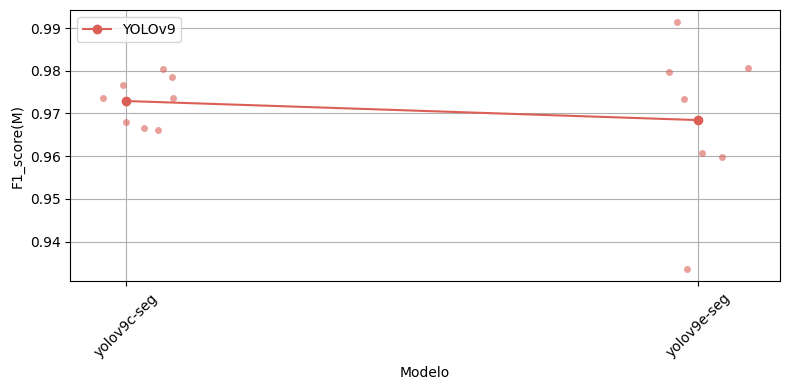

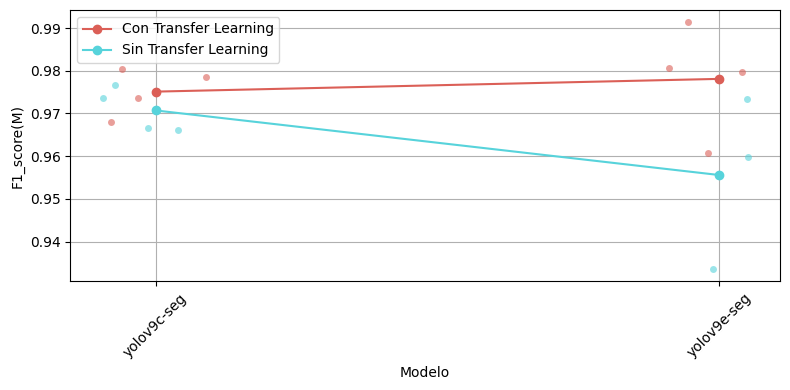

In [11]:
figuras_yolov9_f1score = [plot_metric(**plot_dict_yolov9[0]), plot_metric(**plot_dict_yolov9[1])]

##### mAP50(M)

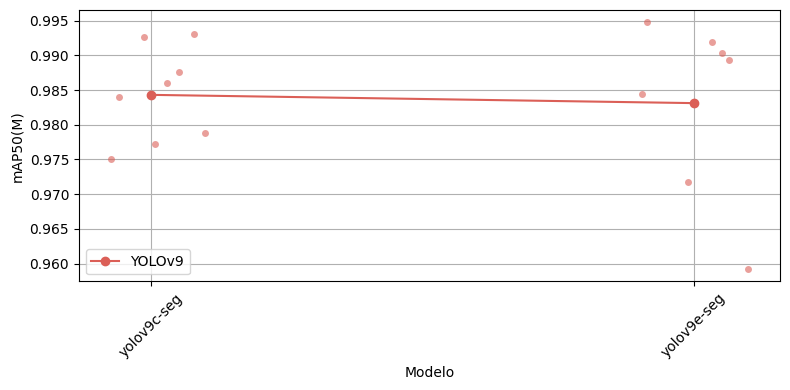

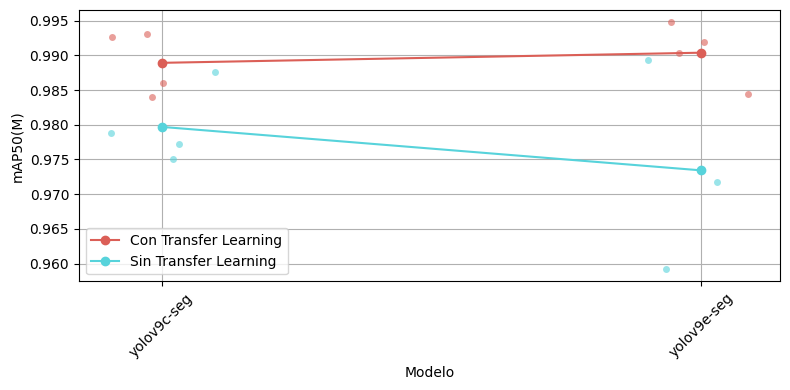

In [12]:
figuras_yolov9_map50 = [plot_metric(**plot_dict_yolov9[2]), plot_metric(**plot_dict_yolov9[3])]

##### mAP50-95(M)

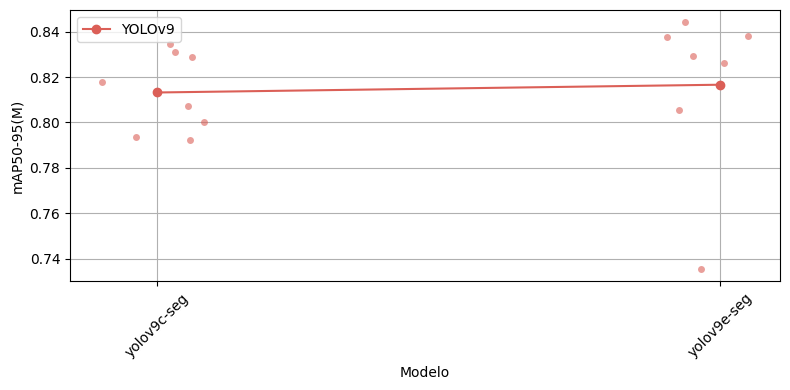

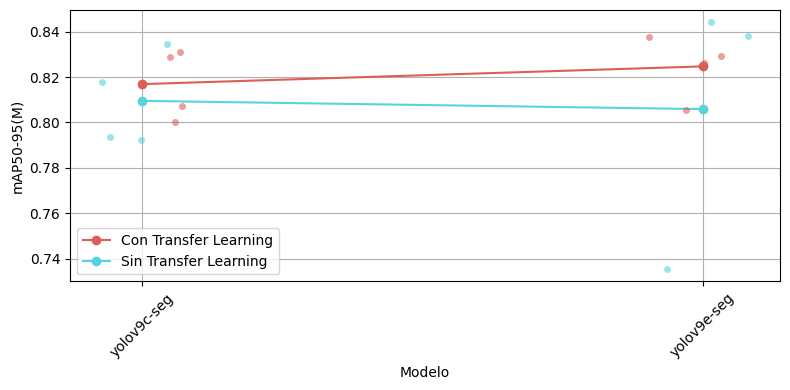

In [13]:
figuras_yolov9_map5095 = [plot_metric(**plot_dict_yolov9[4]), plot_metric(**plot_dict_yolov9[5])]

#### YOLOv11

In [14]:
order = orden_yolo11
label = ["YOLOv11"]

plot_dict_yolo11 = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

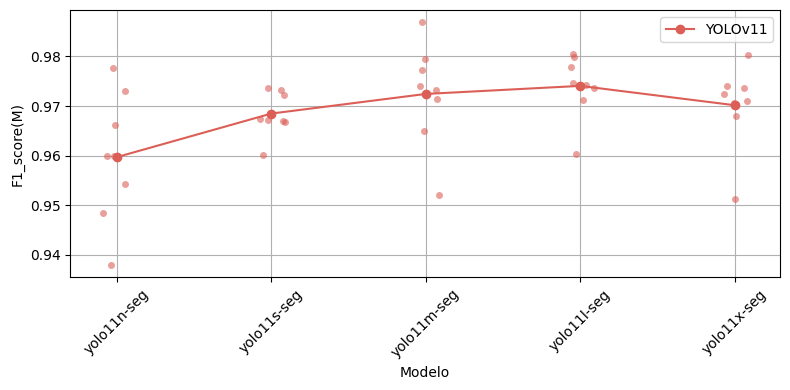

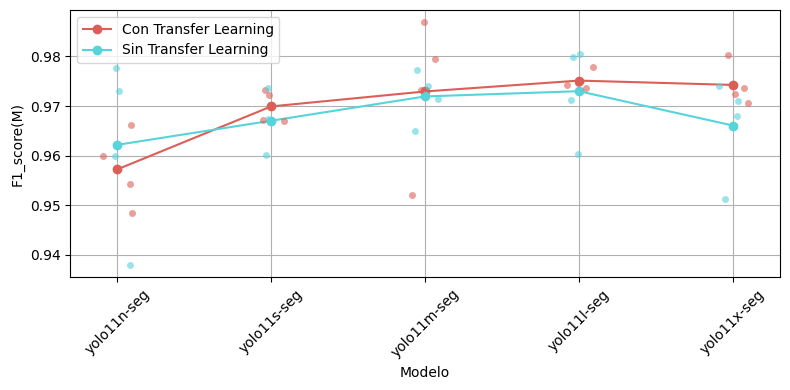

In [15]:
figuras_yolo11_f1score = [plot_metric(**plot_dict_yolo11[0]), plot_metric(**plot_dict_yolo11[1])]

##### mAP50(M)

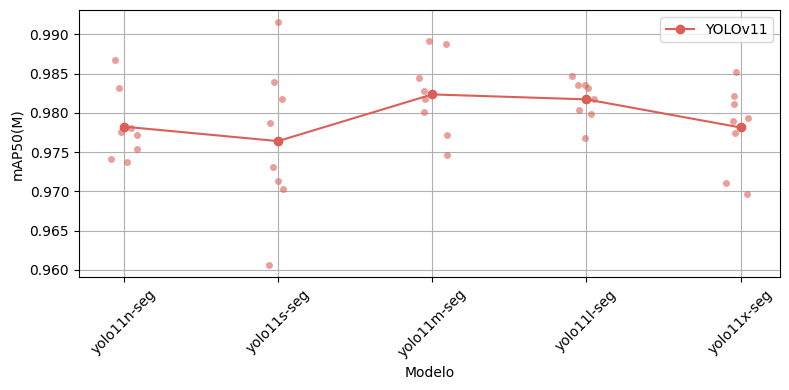

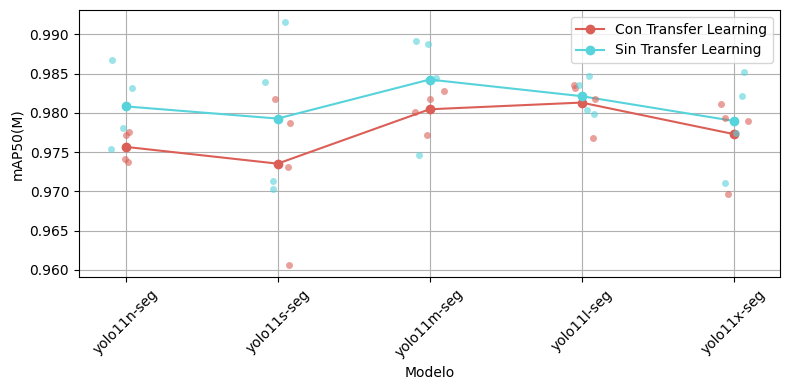

In [16]:
figuras_yolo11_map50 = [plot_metric(**plot_dict_yolo11[2]), plot_metric(**plot_dict_yolo11[3])]

##### mAP50-95(M)

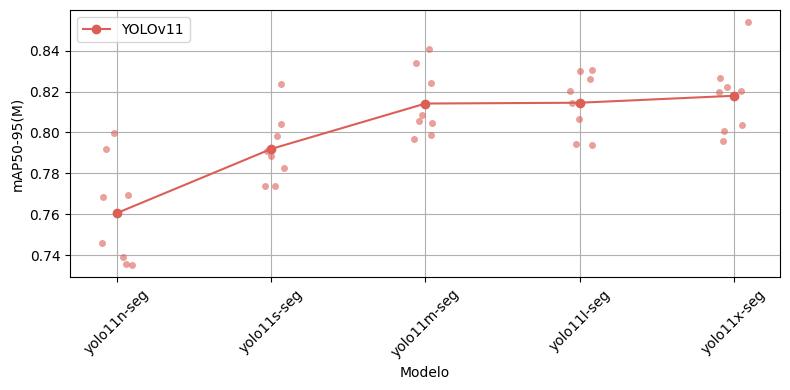

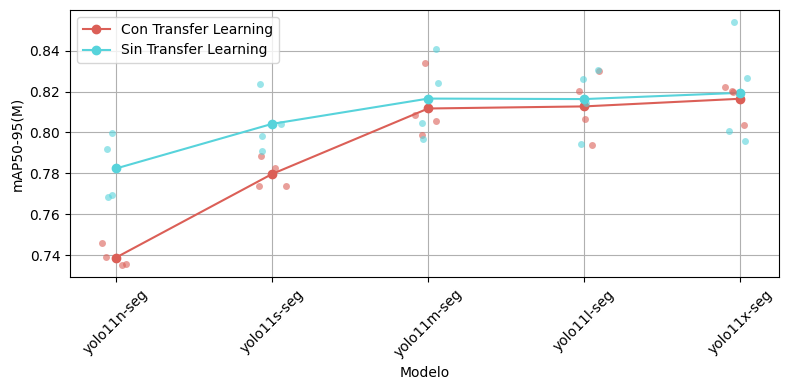

In [17]:
figuras_yolo11_map5095 = [plot_metric(**plot_dict_yolo11[4]), plot_metric(**plot_dict_yolo11[5])]

### Todos juntos

In [18]:
order = models_by_size
label = ["Promedio"]

plot_dict_yolo_todos = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

#### F1_score(M)

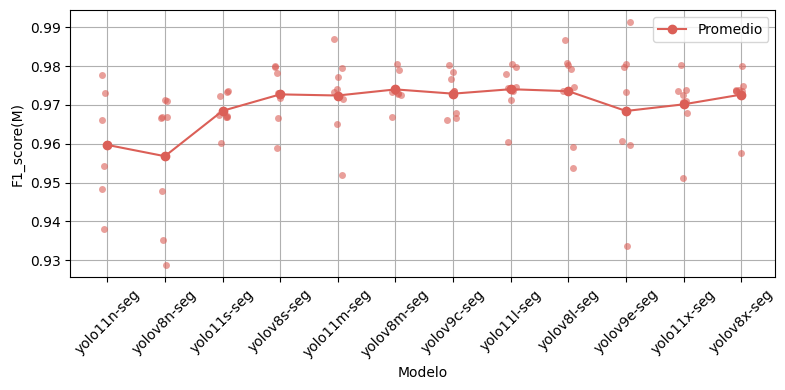

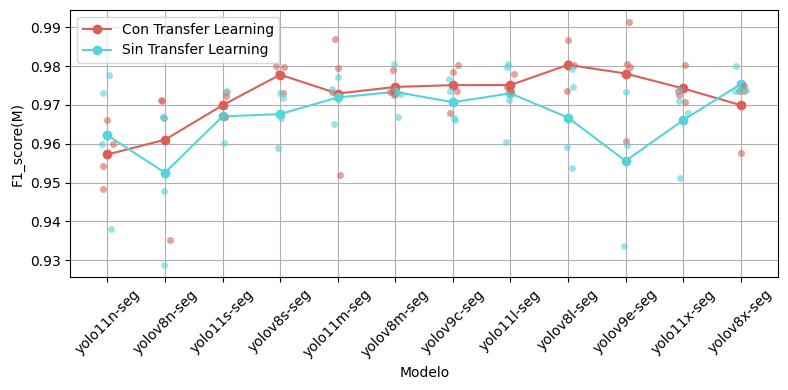

In [19]:
figuras_yolo_f1score = [plot_metric(**plot_dict_yolo_todos[0]), plot_metric(**plot_dict_yolo_todos[1])]

#### mAP50(M)

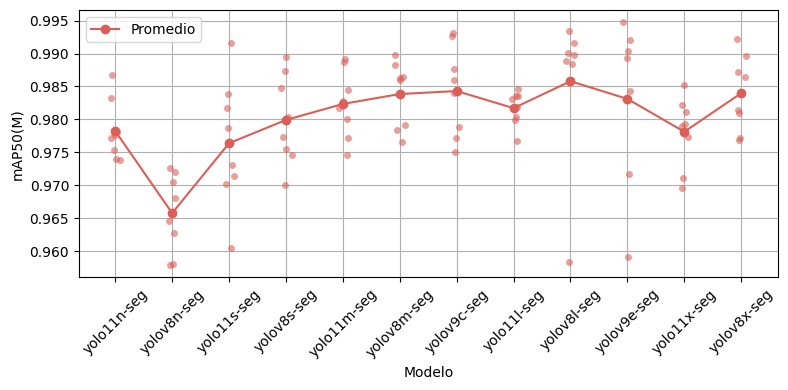

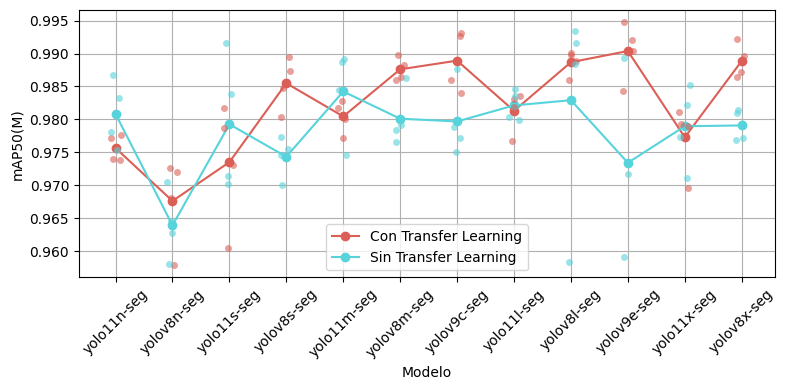

In [20]:
figuras_yolo_map50 = [plot_metric(**plot_dict_yolo_todos[2]), plot_metric(**plot_dict_yolo_todos[3])]

#### mAP50-90(M)

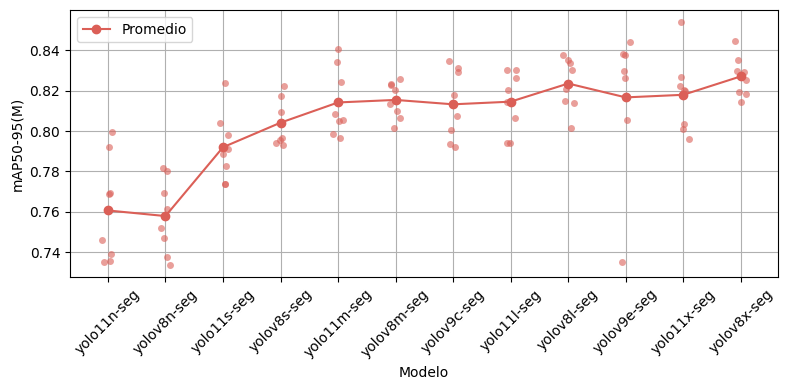

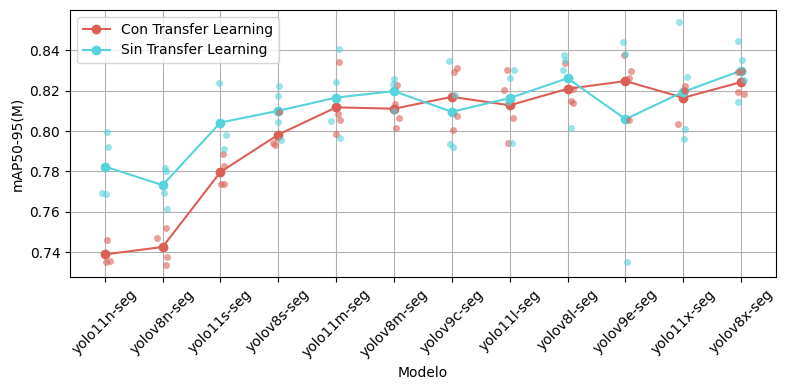

In [21]:
figuras_yolo_map5095 = [plot_metric(**plot_dict_yolo_todos[4]), plot_metric(**plot_dict_yolo_todos[5])]

#### Comparar por Formato (Todos)

In [22]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_pytorch_tt_thr, df_tensor32_tt_thr, df_tensor16_tt_thr, df_tensor8_tt_thr]
group = ["Model"]
groups = ["Model", "Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Pytorch", "Float32", "Float16", "INT8"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = models_by_size
label = ["Promedio"]

plot_dict_yolo_todos_format = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)

##### F1_score(M)

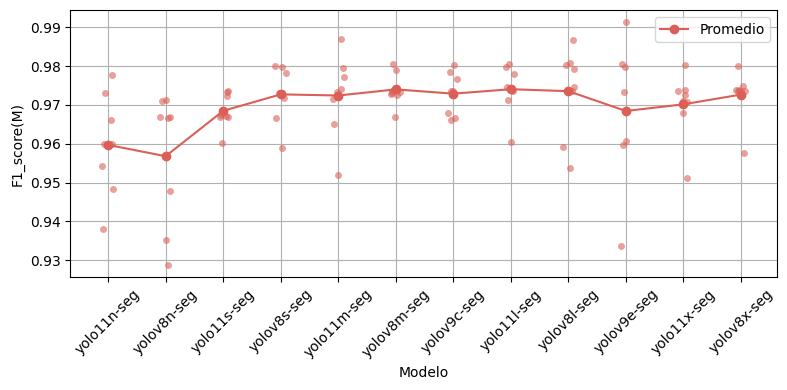

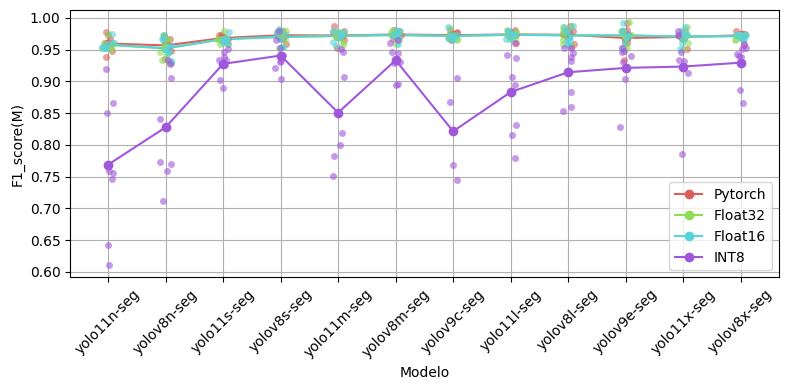

In [23]:
figuras_yolo_format_f1score = [plot_metric(**plot_dict_yolo_todos_format[0]), plot_metric(**plot_dict_yolo_todos_format[1])]

##### mAP50(M)

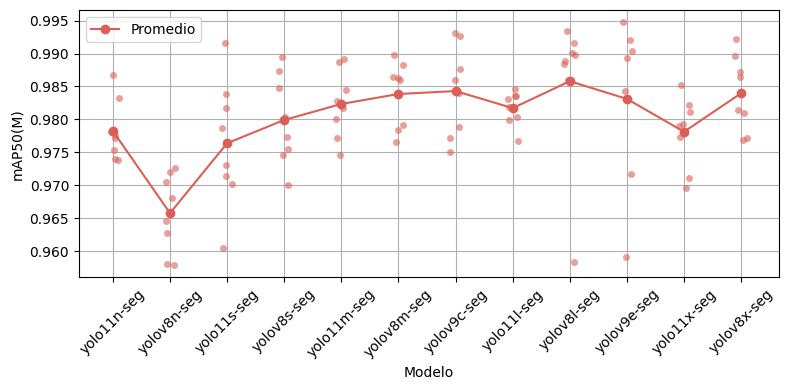

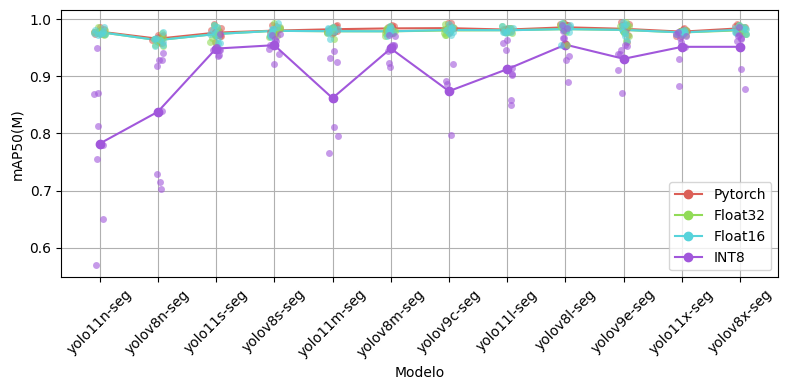

In [24]:
figuras_yolo_format_map50 = [plot_metric(**plot_dict_yolo_todos_format[2]), plot_metric(**plot_dict_yolo_todos_format[3])]

##### mAP50-95(M)

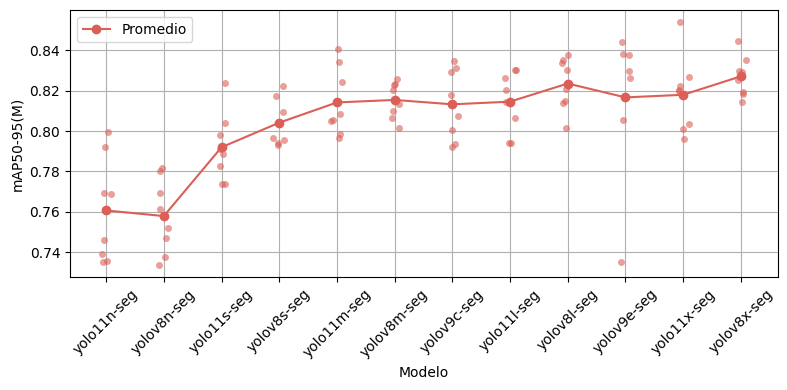

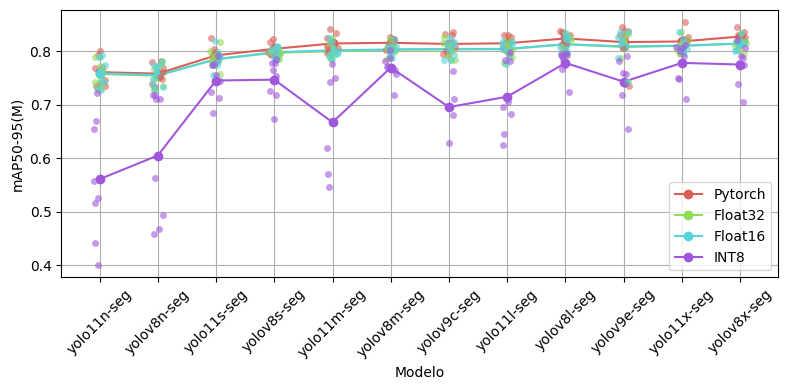

In [25]:
figuras_yolo_format_map5095 = [plot_metric(**plot_dict_yolo_todos_format[4]), plot_metric(**plot_dict_yolo_todos_format[5])]

#### Comparar por Formato (Con y sin Transfer Learning)

In [26]:
datagram = [df_pytorch_tt_thr]
datagrams = [df_tensor8_tl, df_tensor8_fl]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = models_by_size
label = ["Promedio"]
title = "Resultados con exportación TensorRT-INT8"

plot_dict_yolo_todos_int8_tl = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

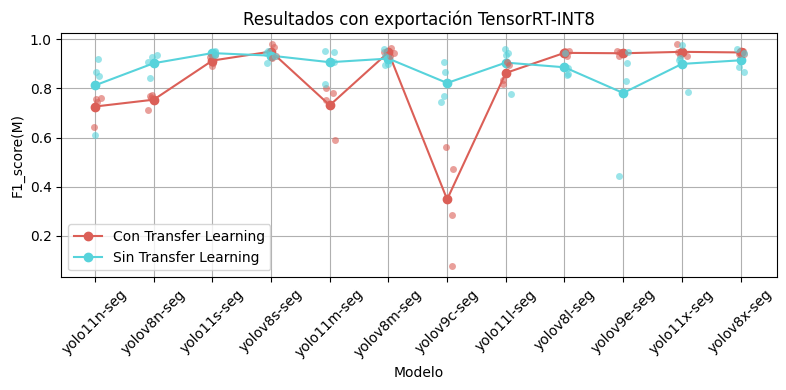

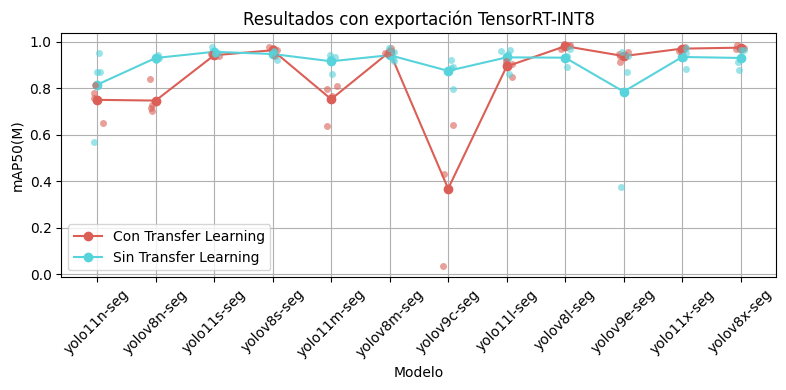

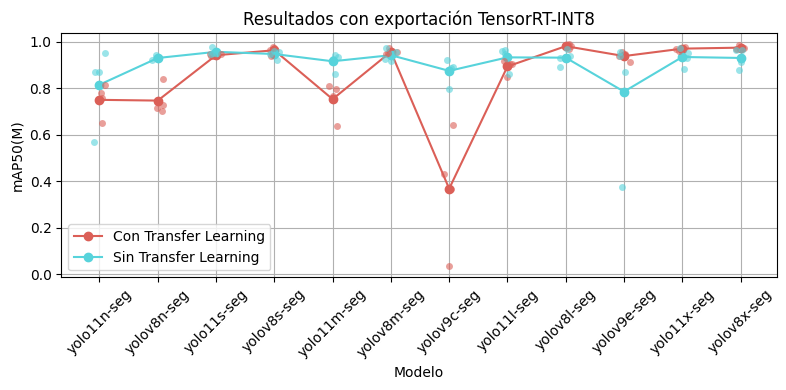

In [27]:
figuras_yolo__todos_int8_map5095 = [plot_metric(**plot_dict_yolo_todos_int8_tl[1]), plot_metric(**plot_dict_yolo_todos_int8_tl[3]), plot_metric(**plot_dict_yolo_todos_int8_tl[3])]

## Conclusiones de comparación según tamaño de modelo:

1) El tamaño del modelo afecta solo un poco en el rendimiento de la tarea de segmentación. Se obtienen mejores rendimientos al aumentar el tamaño del modelo pero la ganancia es cada vez más pequeña. Es posible que esto se deba a que el Dataset Deepfish no es tan complejo.
2) Respecto al efecto del uso de Transfer Learning: no parece ser que exista mucha diferencia. En teoría el en entrenamiento con Transfer Learning debiese dar peores resultados pero no parece ser el caso siempre, al menos no con este dataset y lo entrenamientos realizados hasta ahora. Si se ve una diferencia más notoria con la métrica mAP50-95. Más adelante se analizará el efecto de TL en la exportación del modelo.

## Comparar según optimizador

### Tablas con diferencias

Se comparará el rendimiento de SGD y AdamW para determinar cual es mejor, en promedio. Las metricas a evaluar son F1_score(M), mAP50(M), mAP50-95(M) y fitness. Se separarán en varios casos:
1) Promedio global.
3) Promedio por versión de modelo.
4) Promedio por modelo específico.

Para cada caso además se realizarán las siguientes variantes.
1. Incluyendo y excluyendo exportaciones.
2. Incluyendo y excluyendo outliers (casos muy malos de AdamW).

In [28]:
# Datagrama sin asteriscos Combinados totales (la unica diff con df es el asterisco)
df_tt = df_updated.copy()
df_tt["Model"] = df_tt["Model"].str.replace("*", "", regex=False)

# Datagrama solo con casos de optimizador SGD y AdamW
df_SGD = df_tt[df_tt["Optimizer"].isin(["SGD"])].copy().reset_index(drop=True)
df_AdamW = df_tt[df_tt["Optimizer"].isin(["AdamW"])].copy().reset_index(drop=True)

# Parametros para comparar
columna_1 = "Format"
columna_2 = "Model"
opciones_1 = ["Pytorch", "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
opciones_2 = models_by_size
casos_a_comparar = ["AdamW", "SGD"]

# Comparar por Formato
resultados_1 = comparar_metricas(datagrama=df_updated, columna="Optimizer", casos_a_comparar=casos_a_comparar)
mean_diff_by_format, mean_diff_r_by_format, mean_diff_m_by_format, mean_diff_re_by_format = crear_datagramas_filtrados(resultados_1, columna_1, opciones_1)

# Comparar por Modelo
resultados_2 = comparar_metricas(datagrama=df_tt, columna="Optimizer", casos_a_comparar=casos_a_comparar)
diff_df_all, diff_df_thr, mejora_rel_df_all, mejora_rel_df_thr, factor_df_all, factor_df_thr, reduccion_error_df_all, reduccion_error_df_thr = resultados_2
mean_diff_by_model, mean_diff_r_by_model, mean_diff_m_by_model, mean_diff_re_by_model = crear_datagramas_filtrados(resultados_2, columna_2, opciones_2, orden=model_by_version)

#### Comparación por formato

In [29]:
print("Diferencia entre SGD y AdamW, por formato de exportación.")
mean_diff_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Diferencia entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     0.011670  0.012532     0.026392  0.062887        Pytorch     True
1     0.010353  0.011609     0.025808  0.060774   TensorRT-F32     True
2     0.010262  0.011299     0.025527  0.061034   TensorRT-F16     True
3     0.059605  0.046529     0.056070  0.131731  TensorRT-INT8     True
4     0.022973  0.020492     0.033449  0.079107          Todos     True
5     0.002843  0.002568     0.014580  0.038919        Pytorch    False
6     0.001156  0.001916     0.014072  0.036977   TensorRT-F32    False
7     0.001048  0.001599     0.013764  0.037205   TensorRT-F16    False
8     0.033488  0.018396     0.031053  0.083192  TensorRT-INT8    False
9     0.009247  0.005921     0.018162  0.048520          Todos    False

In [30]:
print("Diferencia porcentual entre SGD y AdamW, por formato de exportación.")
mean_diff_r_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Diferencia porcentual entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     1.204861  1.285064     3.150865  3.654581        Pytorch     True
1     1.060565  1.192997     3.118798  3.560540   TensorRT-F32     True
2     1.050998  1.161587     3.079823  3.572486   TensorRT-F16     True
3     7.560116  5.988688     8.619207  9.620688  TensorRT-INT8     True
4     2.719135  2.407084     4.492173  5.102074          Todos     True
5     0.284971  0.259614     1.741527  2.265545        Pytorch    False
6     0.111689  0.193442     1.712864  2.179535   TensorRT-F32    False
7     0.100667  0.161268     1.672257  2.190478   TensorRT-F16    False
8     3.413782  1.601629     3.645466  4.914053  TensorRT-INT8    False
9     0.938275  0.537000     2.169476  2.854538          Todos    False

In [31]:
# TODO: Datos importantes!!
print("Factor de mejora entre SGD y AdamW, por formato de exportación.")
mean_diff_m_by_format[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format", "Outlier"]].reset_index(drop=True)

Factor de mejora entre SGD y AdamW, por formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format  Outlier
0     1.019664  1.023022     1.065295  1.069620        Pytorch     True
1     1.018741  1.021350     1.064378  1.067604   TensorRT-F32     True
2     1.018684  1.021035     1.064082  1.067863   TensorRT-F16     True
3     1.197823  1.312258     1.629470  1.456000  TensorRT-INT8     True
4     1.063728  1.094416     1.205806  1.165272          Todos     True
5     1.003064  1.002672     1.018452  1.023878        Pytorch    False
6     1.001264  1.002028     1.017949  1.022844   TensorRT-F32    False
7     1.001163  1.001703     1.017562  1.022981   TensorRT-F16    False
8     1.043069  1.025606     1.050564  1.063557  TensorRT-INT8    False
9     1.011638  1.007717     1.025736  1.032824          Todos    False

In [32]:
print("Reducción del loss entre SGD y AdamW, por formato de exportación.")
mean_diff_re_by_format[["loss", "Format", "Outlier"]].reset_index(drop=True)

Reducción del loss entre SGD y AdamW, por formato de exportación.


loss         Format  Outlier
0 -0.499477        Pytorch     True
1 -0.002810   TensorRT-F32     True
2  0.004467   TensorRT-F16     True
3 -0.052942  TensorRT-INT8     True
4 -0.137690          Todos     True
5 -0.515203        Pytorch    False
6 -0.002264   TensorRT-F32    False
7  0.004240   TensorRT-F16    False
8 -0.040142  TensorRT-INT8    False
9 -0.139935          Todos    False

#### Comparación por modelo

In [33]:
print("Diferencia entre SGD y AdamW, por modelo.")
mean_diff_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Diferencia entre SGD y AdamW, por modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model  Outlier
0     -0.001184 -0.002619    -0.006198 -0.004308  yolov8n-seg     True
1      0.004602  0.004760     0.012597  0.038892  yolov8s-seg     True
2      0.010524  0.006805     0.014634  0.046616  yolov8m-seg     True
3      0.000509  0.007311     0.016557  0.048452  yolov8l-seg     True
4      0.008705  0.006050     0.020703  0.051891  yolov8x-seg     True
5      0.042304  0.040167     0.046096  0.107537  yolov9c-seg     True
6      0.129587  0.137742     0.181246  0.370506  yolov9e-seg     True
7      0.015642  0.009481     0.011383  0.016622  yolo11n-seg     True
8     -0.001372  0.001578     0.016184  0.048472  yolo11s-seg     True
9      0.019674  0.015557     0.035334  0.079684  yolo11m-seg     True
10     0.025954  0.009318     0.022483  0.064974  yolo11l-seg     True
11     0.020726  0.009756     0.030373  0.079942  yolo11x-seg     True
12     0.022973  0.020492     0.033449  0.079107        Todos     True
13    -0.001184 -0.002619    -0.006198 -0.004308  yolov8n-seg    False
14     0.004602  0.004760     0.012597  0.038892  yolov8s-seg    False
15     0.010524  0.006805     0.014634  0.046616  yolov8m-seg    False
16     0.000509  0.007311     0.016557  0.048452  yolov8l-seg    False
17     0.008705  0.006050     0.020703  0.051891  yolov8x-seg    False
18     0.000225 -0.002073     0.016629  0.048279  yolov9c-seg    False
19     0.021266  0.017454     0.045854  0.096479  yolov9e-seg    False
20     0.015642  0.009481     0.011383  0.016622  yolo11n-seg    False
21    -0.001372  0.001578     0.016184  0.048472  yolo11s-seg    False
22     0.007109  0.005057     0.023826  0.058513  yolo11m-seg    False
23     0.025954  0.009318     0.022483  0.064974  yolo11l-seg    False
24     0.020726  0.009756     0.030373  0.079942  yolo11x-seg    False
25     0.009247  0.005921     0.018162  0.048520        Todos    False

In [34]:
print("Diferencia porcentual entre SGD y AdamW, por modelo.")
mean_diff_r_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Diferencia porcentual entre SGD y AdamW, por modelo.


F1_score(M)   mAP50(M)  mAP50-95(M)    fitness        Model  Outlier
0     -0.118384  -0.509298    -1.163910  -0.479060  yolov8n-seg     True
1      0.473649   0.491003     1.621557   2.385512  yolov8s-seg     True
2      1.098723   0.704762     1.835552   2.823918  yolov8m-seg     True
3      0.079369   0.757621     2.022024   2.873625  yolov8l-seg     True
4      0.914567   0.631329     2.529749   3.090352  yolov8x-seg     True
5      8.323852   8.125861    10.570113  11.163839  yolov9c-seg     True
6     13.491196  14.258415    22.041890  21.873218  yolov9e-seg     True
7      1.363209   0.471770     0.891150   0.465365  yolo11n-seg     True
8     -0.143334   0.162083     2.073526   3.007112  yolo11s-seg     True
9      2.268335   1.792212     4.965890   5.322469  yolo11m-seg     True
10     2.758728   0.993574     2.817173   3.975977  yolo11l-seg     True
11     2.119710   1.005676     3.701366   4.722557  yolo11x-seg     True
12     2.719135   2.407084     4.492173   5.102074        Todos     True
13    -0.118384  -0.509298    -1.163910  -0.479060  yolov8n-seg    False
14     0.473649   0.491003     1.621557   2.385512  yolov8s-seg    False
15     1.098723   0.704762     1.835552   2.823918  yolov8m-seg    False
16     0.079369   0.757621     2.022024   2.873625  yolov8l-seg    False
17     0.914567   0.631329     2.529749   3.090352  yolov8x-seg    False
18    -0.009502  -0.352975     1.918132   2.842081  yolov9c-seg    False
19     2.226300   1.801510     5.615829   5.720195  yolov9e-seg    False
20     1.363209   0.471770     0.891150   0.465365  yolo11n-seg    False
21    -0.143334   0.162083     2.073526   3.007112  yolo11s-seg    False
22     0.683897   0.488810     3.057213   3.587492  yolo11m-seg    False
23     2.758728   0.993574     2.817173   3.975977  yolo11l-seg    False
24     2.119710   1.005676     3.701366   4.722557  yolo11x-seg    False
25     0.938275   0.537000     2.169476   2.854538        Todos    False

In [35]:
print("Factor de mejora entre SGD y AdamW, por modelo.")
mean_diff_m_by_model[["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model", "Outlier"]].reset_index(drop=True)

Factor de mejora entre SGD y AdamW, por modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model  Outlier
0      0.999595  0.996728     0.991077  0.996931  yolov8n-seg     True
1      1.005038  1.005029     1.016931  1.024661  yolov8s-seg     True
2      1.011508  1.007392     1.018924  1.029426  yolov8m-seg     True
3      1.001610  1.008062     1.021283  1.030417  yolov8l-seg     True
4      1.010017  1.007074     1.027507  1.033648  yolov8x-seg     True
5      1.381746  1.750736     2.521247  1.999406  yolov9c-seg     True
6      1.244021  1.288042     1.684751  1.650670  yolov9e-seg     True
7      1.026289  1.024629     1.035037  1.029001  yolo11n-seg     True
8      0.998795  1.001717     1.021508  1.031302  yolo11s-seg     True
9      1.030245  1.022112     1.061866  1.064201  yolo11m-seg     True
10     1.031414  1.010791     1.029968  1.042502  yolo11l-seg     True
11     1.024460  1.010680     1.039574  1.051099  yolo11x-seg     True
12     1.063728  1.094416     1.205806  1.165272        Todos     True
13     0.999595  0.996728     0.991077  0.996931  yolov8n-seg    False
14     1.005038  1.005029     1.016931  1.024661  yolov8s-seg    False
15     1.011508  1.007392     1.018924  1.029426  yolov8m-seg    False
16     1.001610  1.008062     1.021283  1.030417  yolov8l-seg    False
17     1.010017  1.007074     1.027507  1.033648  yolov8x-seg    False
18     1.000151  0.997505     1.020869  1.029989  yolov9c-seg    False
19     1.023287  1.018871     1.063007  1.064858  yolov9e-seg    False
20     1.026289  1.024629     1.035037  1.029001  yolo11n-seg    False
21     0.998795  1.001717     1.021508  1.031302  yolo11s-seg    False
22     1.008795  1.005496     1.032261  1.038041  yolo11m-seg    False
23     1.031414  1.010791     1.029968  1.042502  yolo11l-seg    False
24     1.024460  1.010680     1.039574  1.051099  yolo11x-seg    False
25     1.011638  1.007717     1.025736  1.032824        Todos    False

In [36]:
print("Reducción del loss entre SGD y AdamW, por modelo.")
mean_diff_re_by_model[["loss", "Model", "Outlier"]].reset_index(drop=True)

Reducción del loss entre SGD y AdamW, por modelo.


loss        Model  Outlier
0   0.044305  yolov8n-seg     True
1  -0.081818  yolov8s-seg     True
2  -0.554145  yolov8m-seg     True
3  -0.049752  yolov8l-seg     True
4  -0.061512  yolov8x-seg     True
5   0.039025  yolov9c-seg     True
6  -0.033300  yolov9e-seg     True
7  -0.736238  yolo11n-seg     True
8  -0.080839  yolo11s-seg     True
9  -0.014702  yolo11m-seg     True
10  0.004702  yolo11l-seg     True
11 -0.128009  yolo11x-seg     True
12 -0.137690        Todos     True
13  0.044305  yolov8n-seg    False
14 -0.081818  yolov8s-seg    False
15 -0.554145  yolov8m-seg    False
16 -0.049752  yolov8l-seg    False
17 -0.061512  yolov8x-seg    False
18  0.075829  yolov9c-seg    False
19 -0.040492  yolov9e-seg    False
20 -0.736238  yolo11n-seg    False
21 -0.080839  yolo11s-seg    False
22 -0.011381  yolo11m-seg    False
23  0.004702  yolo11l-seg    False
24 -0.128009  yolo11x-seg    False
25 -0.139935        Todos    False

### Con gráficos - Comparación simple

Se visualizan los rendimientos de SGD y AdamW en gráficos donde se muestran las métricas a comparar y sus diferencias.

In [37]:
datagram = [mean_diff_m_by_model]
datagrams = [df_SGD[df_SGD["F1_score(M)"]>=0.6], df_AdamW[df_AdamW["F1_score(M)"]>=0.6]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["SGD", "AdamW"]
xlabel = "Modelo"
ylabel = metrics

#### YOLOv8

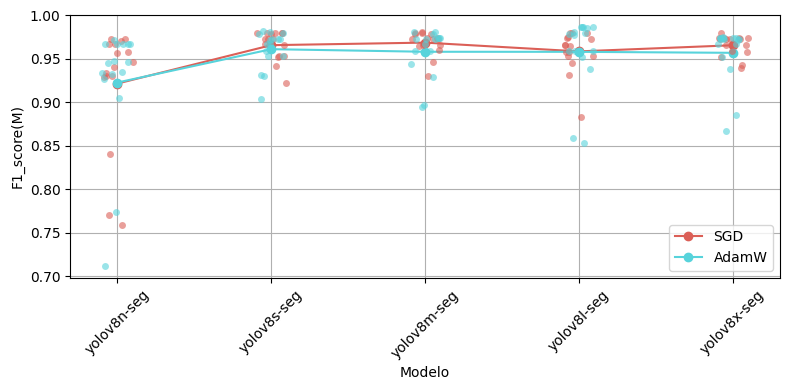

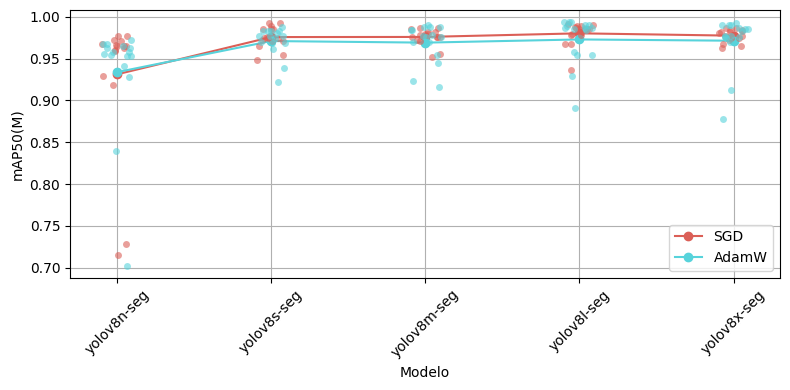

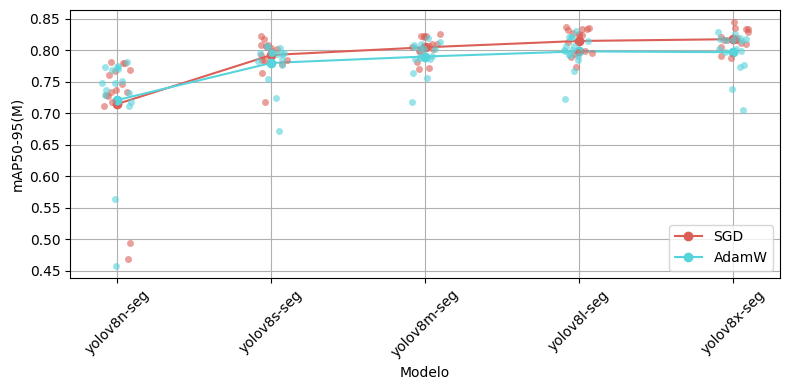

In [38]:
order = orden_yolov8
label = ["YOLOv8"]
plot_dict_yolov8_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolov8_opt_simple = [plot_metric(**plot_dict_yolov8_opt_simple[1]), plot_metric(**plot_dict_yolov8_opt_simple[3]), plot_metric(**plot_dict_yolov8_opt_simple[5])]

#### YOLOv9

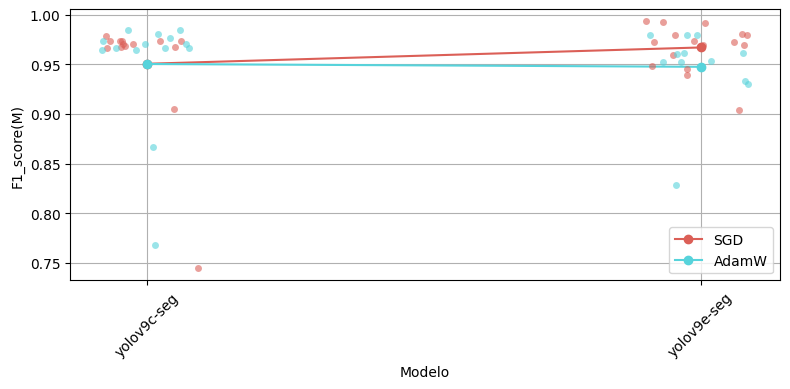

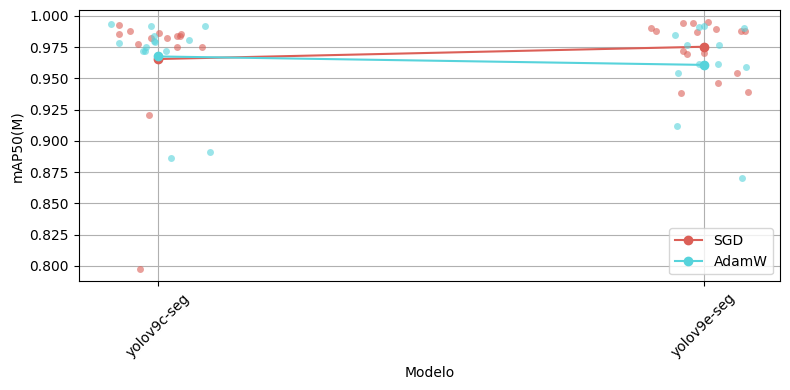

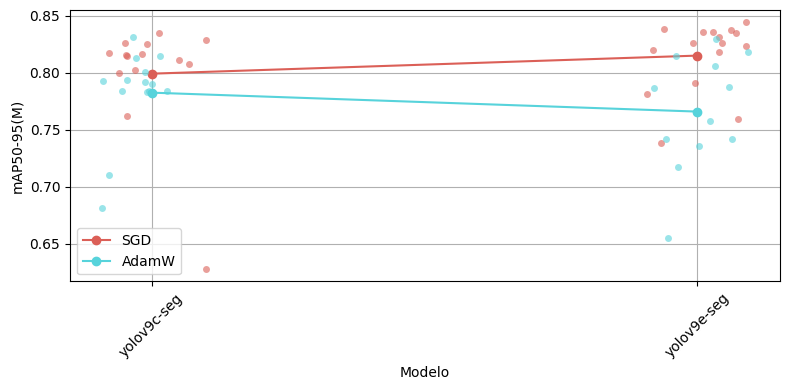

In [39]:
order = orden_yolov9
label = ["YOLOv9"]
plot_dict_yolov9_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolov9_opt_simple = [plot_metric(**plot_dict_yolov9_opt_simple[1]), plot_metric(**plot_dict_yolov9_opt_simple[3]), plot_metric(**plot_dict_yolov9_opt_simple[5])]

#### YOLOv11

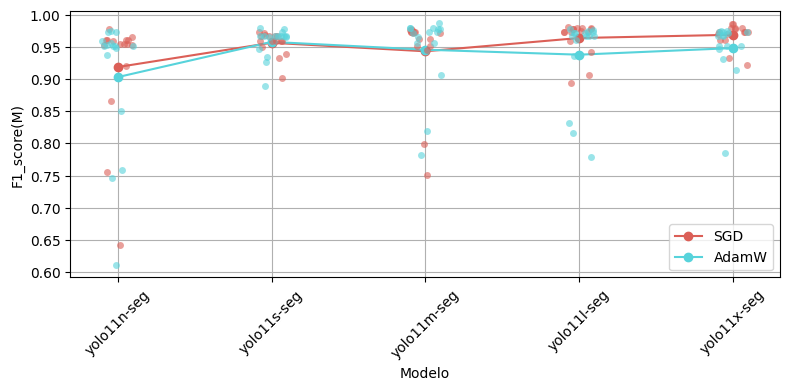

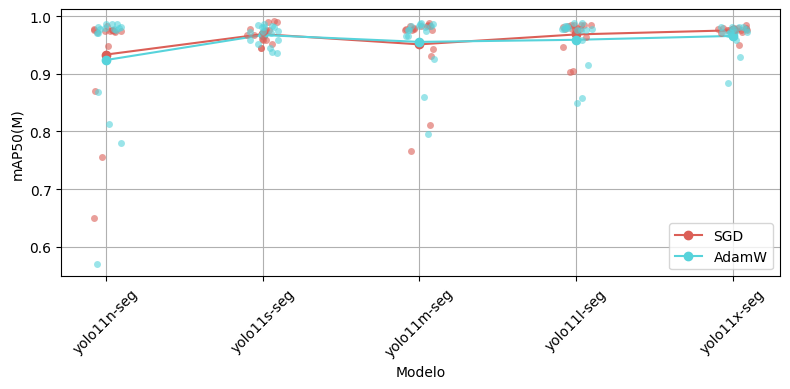

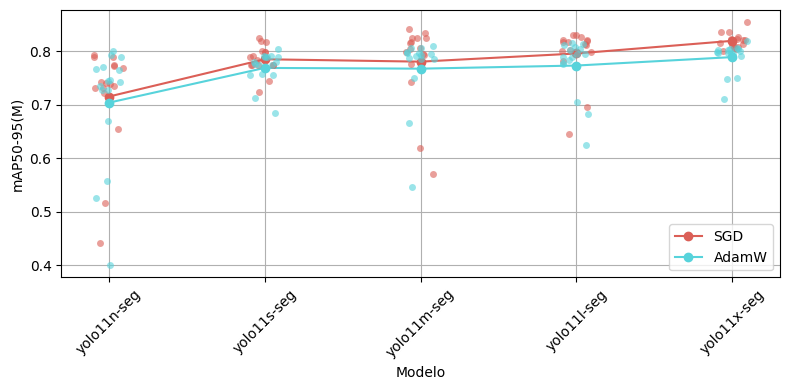

In [40]:
order = orden_yolo11
label = ["YOLOv11"]
plot_dict_yolo11_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolo11_opt_simple = [plot_metric(**plot_dict_yolo11_opt_simple[1]), plot_metric(**plot_dict_yolo11_opt_simple[3]), plot_metric(**plot_dict_yolo11_opt_simple[5])]

#### Todos juntos

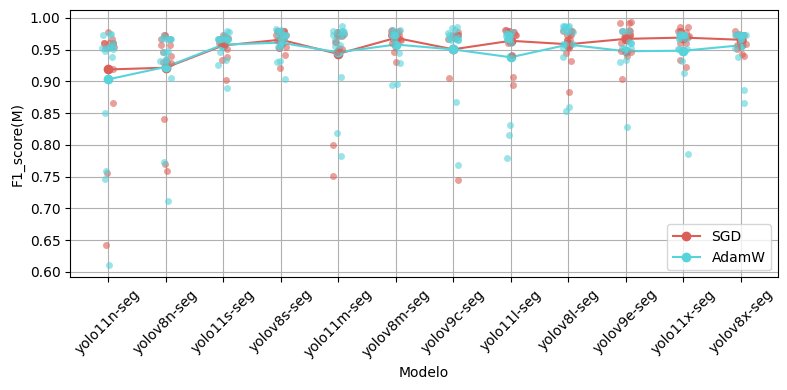

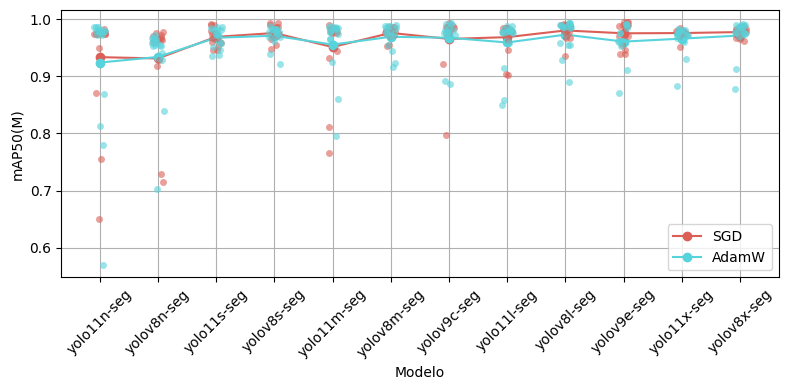

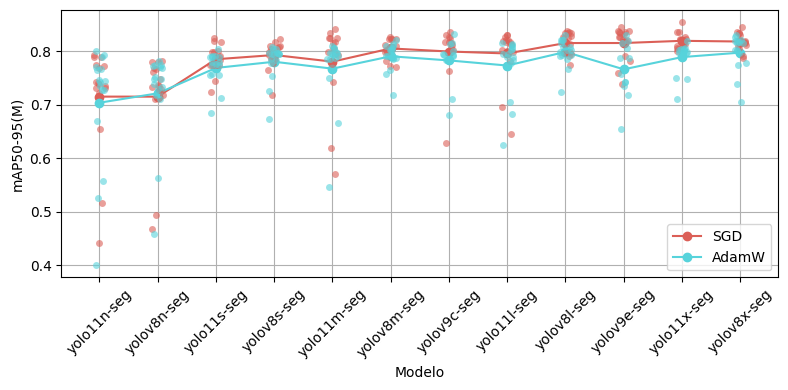

In [41]:
order = models_by_size
label = ["Promedio"]
plot_dict_yolo_opt_simple = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel)
figuras_yolo_opt_simple = [plot_metric(**plot_dict_yolo_opt_simple[1]), plot_metric(**plot_dict_yolo_opt_simple[3]), plot_metric(**plot_dict_yolo_opt_simple[5])]

### Con gráficos - Comparación factor de mejora

In [42]:
datagram = [mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==False]]
datagrams = [mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==False], mean_diff_m_by_model[mean_diff_m_by_model["Outlier"]==True]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Sin Outliers", "Con Outliers"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora entre SGD y AdamW."

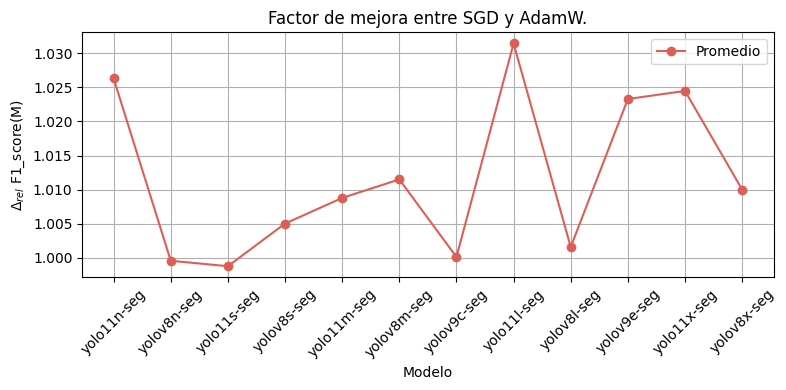

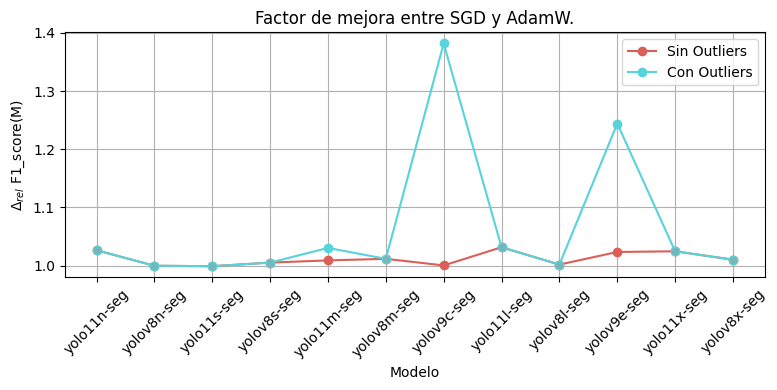

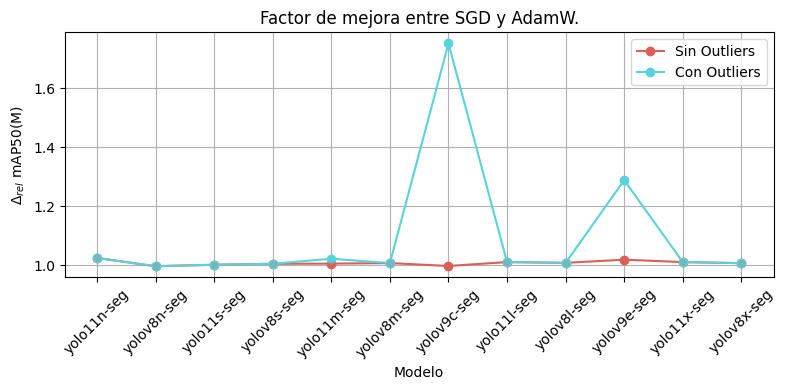

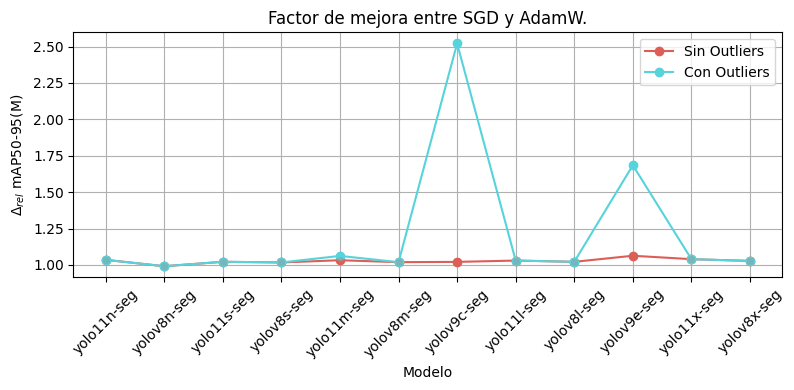

In [43]:
#TODO: Datos importantes!!!
order = models_by_size
label = ["Promedio"]
plot_dict_yolo11_opt_diffm = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)
figuras_yolo11_opt_diffm = [plot_metric(**plot_dict_yolo11_opt_diffm[0]), plot_metric(**plot_dict_yolo11_opt_diffm[1]), plot_metric(**plot_dict_yolo11_opt_diffm[3]), plot_metric(**plot_dict_yolo11_opt_diffm[5])]

## Conclusiones de comparación según optimizador:

1) SGD es ligeramente superior a AdamW.
2) La diferencia entre SGD y AdamW se hace mayor al realizar exportación en TensorRT con cuantización númerica.
3) AdamW tiene mayor tendencia a fallar en el entrenamiento (casos outliers) lo que lo hace menos fiable.

## Efecto de la exportación
Se vieron algunos efectos de la exportación antes, pero ahora se mostrarán los efectos más directos.

### Tablas comparativas

In [44]:
# Parametros para comparar
columnas_1 = "Model"
columnas_2 = "Format"
opciones_1 = model_by_version
opciones_2 = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
casos_a_comparar_1 = ["Pytorch", "TensorRT-F32"]
casos_a_comparar_2 = ["Pytorch", "TensorRT-F16"]
casos_a_comparar_3 = ["Pytorch", "TensorRT-INT8"]
casos_a_comparar_4 = [False, True]

# Comparar por Modelo
resultados_tt_1 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_tt_2 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_tt_3 = comparar_metricas(datagrama=df_updated, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_tt_1, mean_diff_r_by_format_tt_1, mean_diff_m_by_format_tt_1, mean_diff_re_by_format_tt_1 = crear_datagramas_filtrados(resultados_tt_1, columnas_1, opciones_1)
mean_diff_by_format_tt_2, mean_diff_r_by_format_tt_2, mean_diff_m_by_format_tt_2, mean_diff_re_by_format_tt_2 = crear_datagramas_filtrados(resultados_tt_2, columnas_1, opciones_1)
mean_diff_by_format_tt_3, mean_diff_r_by_format_tt_3, mean_diff_m_by_format_tt_3, mean_diff_re_by_format_tt_3 = crear_datagramas_filtrados(resultados_tt_3, columnas_1, opciones_1)

# Comparar por Modelo (sin transfer learning)
resultados_fl_1 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_fl_2 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_fl_3 = comparar_metricas(datagrama=df_fl, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_fl_1, mean_diff_r_by_format_fl_1, mean_diff_m_by_format_fl_1, mean_diff_re_by_format_fl_1 = crear_datagramas_filtrados(resultados_fl_1, columnas_1, opciones_1)
mean_diff_by_format_fl_2, mean_diff_r_by_format_fl_2, mean_diff_m_by_format_fl_2, mean_diff_re_by_format_fl_2 = crear_datagramas_filtrados(resultados_fl_2, columnas_1, opciones_1)
mean_diff_by_format_fl_3, mean_diff_r_by_format_fl_3, mean_diff_m_by_format_fl_3, mean_diff_re_by_format_fl_3 = crear_datagramas_filtrados(resultados_fl_3, columnas_1, opciones_1)

# Comparar por Modelo (con transfer learning)
resultados_tl_1 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_1)
resultados_tl_2 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_2)
resultados_tl_3 = comparar_metricas(datagrama=df_tl, columna="Format", casos_a_comparar=casos_a_comparar_3)
mean_diff_by_format_tl_1, mean_diff_r_by_format_tl_1, mean_diff_m_by_format_tl_1, mean_diff_re_by_format_tl_1 = crear_datagramas_filtrados(resultados_tl_1, columnas_1, opciones_1)
mean_diff_by_format_tl_2, mean_diff_r_by_format_tl_2, mean_diff_m_by_format_tl_2, mean_diff_re_by_format_tl_2 = crear_datagramas_filtrados(resultados_tl_2, columnas_1, opciones_1)
mean_diff_by_format_tl_3, mean_diff_r_by_format_tl_3, mean_diff_m_by_format_tl_3, mean_diff_re_by_format_tl_3 = crear_datagramas_filtrados(resultados_tl_3, columnas_1, opciones_1)

# Comparar por transfer learning
resultados_caso = comparar_metricas(datagrama=df_updated, columna="TransferLearning", casos_a_comparar=casos_a_comparar_4)
mean_diff_by_TL, mean_diff_r_by_TL, mean_diff_m_by_TL, mean_diff_re_by_TL = crear_datagramas_filtrados(resultados_caso, columnas_2, opciones_2)

In [45]:
print("Mejora relativa entre Pytorch y TensorRT")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_tt_1, mean_diff_m_by_format_tt_2, mean_diff_m_by_format_tt_3)

Mejora relativa entre Pytorch y TensorRT


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.998918  0.997428     0.988555  0.990178    0.511446   1.313766   
0     0.998980  0.997606     0.989441  0.990703    0.538357   0.485526   
0     0.917626  0.929447     0.888295  0.880387    0.563398   0.353708   

   postprocess         Format  
0     1.904044   TensorRT-F32  
0     1.819522   TensorRT-F16  
0     1.619563  TensorRT-INT8

In [46]:
print("Mejora relativa entre Pytorch y TensorRT (sin Transfer Learning)")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_fl_1, mean_diff_m_by_format_fl_2, mean_diff_m_by_format_fl_3)

Mejora relativa entre Pytorch y TensorRT (sin Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.999260  0.997905     0.991666  0.993004    0.499387   1.267337   
0     0.999322  0.998246     0.992633  0.993567    0.513668   0.464642   
0     0.924515  0.938891     0.913942  0.901018    0.555033   0.331690   

   postprocess         Format  
0     1.982860   TensorRT-F32  
0     1.803849   TensorRT-F16  
0     1.531165  TensorRT-INT8

In [47]:
print("Mejora relativa entre Pytorch y TensorRT (con Transfer Learning)")
crear_tabla_comparativa_para_formatos(mean_diff_m_by_format_tl_1, mean_diff_m_by_format_tl_2, mean_diff_m_by_format_tl_3)

Mejora relativa entre Pytorch y TensorRT (con Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.998582  0.996960     0.985508  0.987412    0.523253   1.359228   
0     0.998645  0.996979     0.986316  0.987898    0.562532   0.505975   
0     0.910096  0.919125     0.860261  0.857837    0.572541   0.377774   

   postprocess         Format  
0     1.826870   TensorRT-F32  
0     1.834869   TensorRT-F16  
0     1.716184  TensorRT-INT8

### Con gráficos - Caso promedio (sin outliers)

In [48]:
datagram_1 = [mean_diff_m_by_format_tt_1]
datagram_2 = [mean_diff_m_by_format_fl_1]
datagram_3 = [mean_diff_m_by_format_tl_1]
datagrams_1 = [mean_diff_m_by_format_tt_1[mean_diff_m_by_format_tt_1["Outlier"]==False],
               mean_diff_m_by_format_tt_2[mean_diff_m_by_format_tt_2["Outlier"]==False],
               mean_diff_m_by_format_tt_3[mean_diff_m_by_format_tt_3["Outlier"]==False]]
datagrams_2 = [mean_diff_m_by_format_fl_1,
               mean_diff_m_by_format_fl_2,
               mean_diff_m_by_format_fl_3]
datagrams_3 = [mean_diff_m_by_format_tl_1,
               mean_diff_m_by_format_tl_2,
               mean_diff_m_by_format_tl_3]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Float32", "Float16", "INT8"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]

order = models_by_size
label = ["Promedio"]
title_1 = "Factor de cambio entre Pytorch y TensorRT"
title_2 = "Factor de cambio entre Pytorch y TensorRT, sin Transfer Learning"
title_3 = "Factor de cambio entre Pytorch y TensorRT, con Transfer Learning"

plot_dict_yolo_format_ft_diffm = crear_lista_diccionarios(datagram_1, datagrams_1, group, groups, metrics, label, labels, order, xlabel, ylabel, title_1)
plot_dict_yolo_format_fl_diffm = crear_lista_diccionarios(datagram_2, datagrams_2, group, groups, metrics, label, labels, order, xlabel, ylabel, title_2)
plot_dict_yolo_format_tl_diffm = crear_lista_diccionarios(datagram_3, datagrams_3, group, groups, metrics, label, labels, order, xlabel, ylabel, title_3)

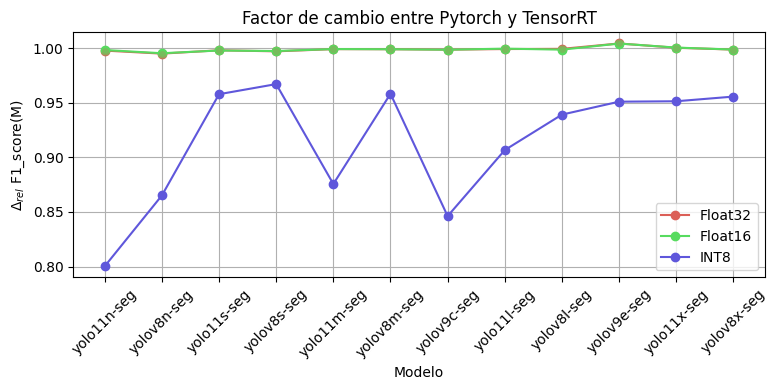

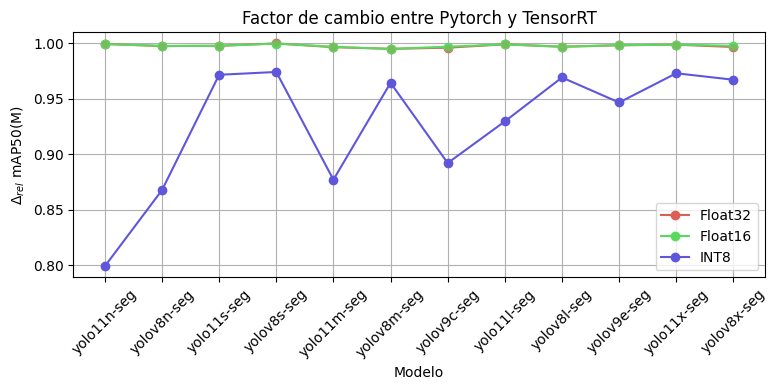

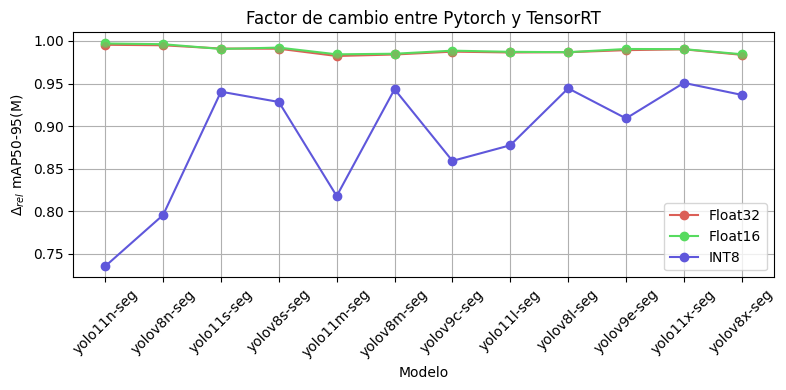

In [49]:
#TODO: Datos importantes!!!
figuras_yolo_format_ft_diffm = [plot_metric(**plot_dict_yolo_format_ft_diffm[1]), plot_metric(**plot_dict_yolo_format_ft_diffm[3]), plot_metric(**plot_dict_yolo_format_ft_diffm[5])]

### Con gráficos - Caso sin Transfer Learning (con outliers)

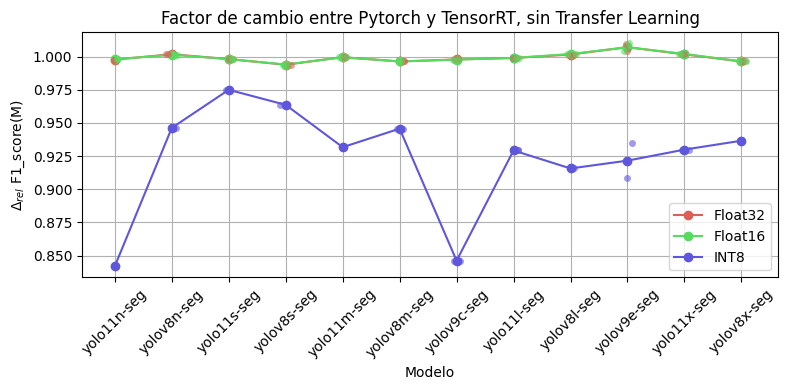

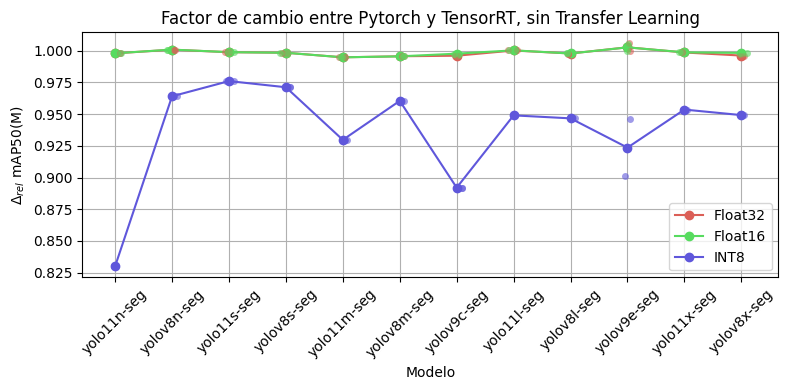

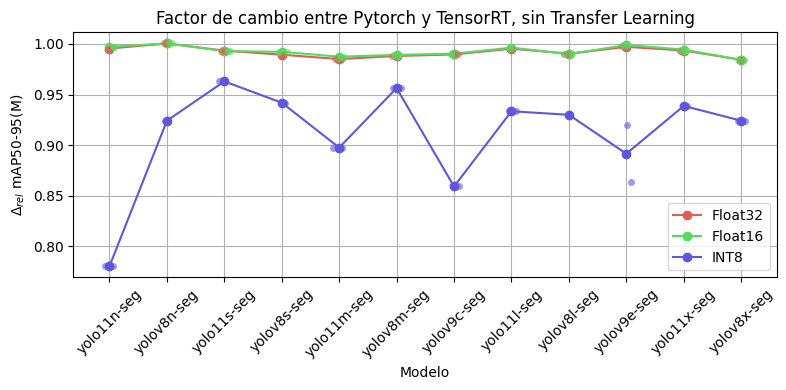

In [50]:
figuras_yolo_format_fl_diffm = [plot_metric(**plot_dict_yolo_format_fl_diffm[1]), plot_metric(**plot_dict_yolo_format_fl_diffm[3]), plot_metric(**plot_dict_yolo_format_fl_diffm[5])]

### Con gráficos - Caso con Transfer Learning (con outliers)

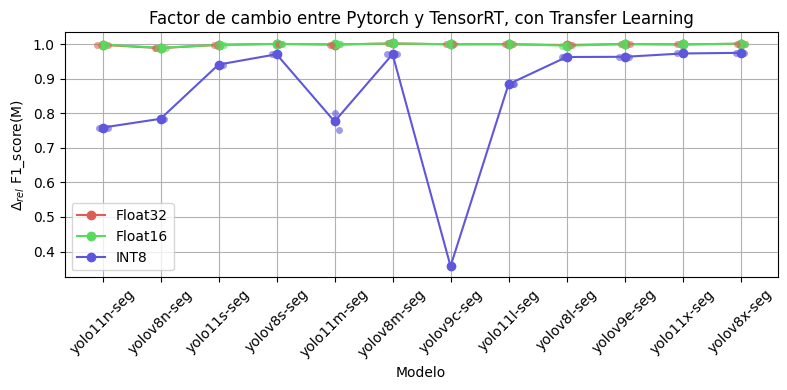

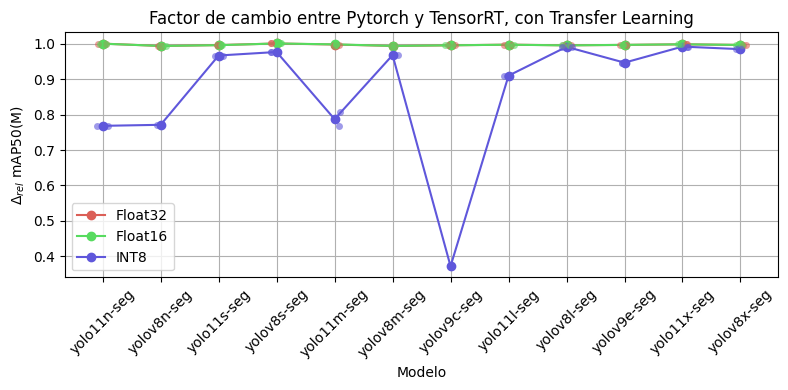

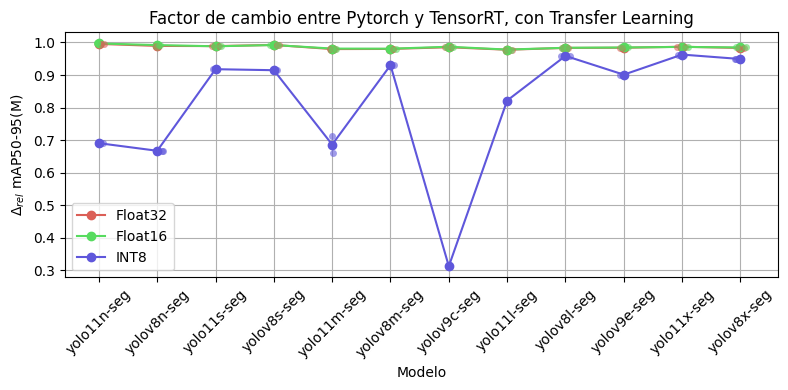

In [51]:
figuras_yolo_format_tl_diffm = [plot_metric(**plot_dict_yolo_format_tl_diffm[1]), plot_metric(**plot_dict_yolo_format_tl_diffm[3]), plot_metric(**plot_dict_yolo_format_tl_diffm[5])]

### Efecto del Transfer Learning al realizar cambio de formato a TensorRT

In [52]:
datagram = [mean_diff_m_by_TL]
datagrams = [mean_diff_m_by_TL, mean_diff_m_by_TL[mean_diff_m_by_TL["Outlier"]==False], mean_diff_m_by_TL[mean_diff_m_by_TL["Outlier"]==True]]

group = ["Format"]
groups = ["Format", "Format", "Format", "Format"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
labels = ["Promedio", "Sin outliers", " Con outliers"]
xlabel = "Formato de exportación"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora de usar Transfer Learning."

order = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
label = ["Promedio"]

plot_dict_yolo_TransferLearning_diffm = crear_lista_diccionarios(datagram, datagrams, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

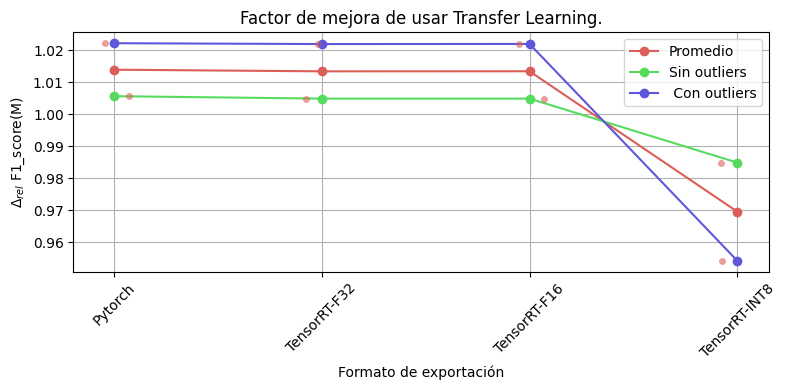

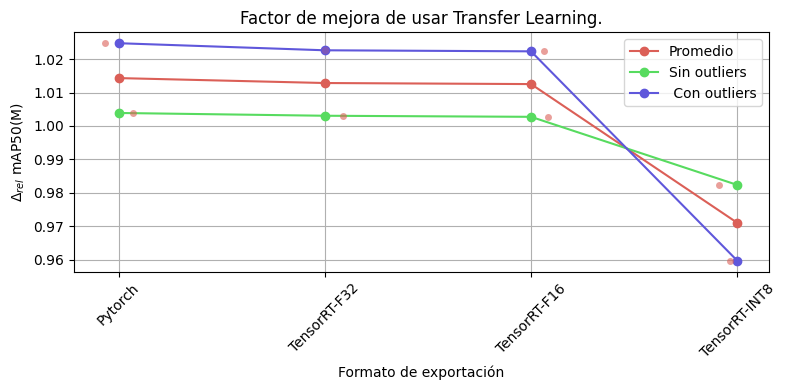

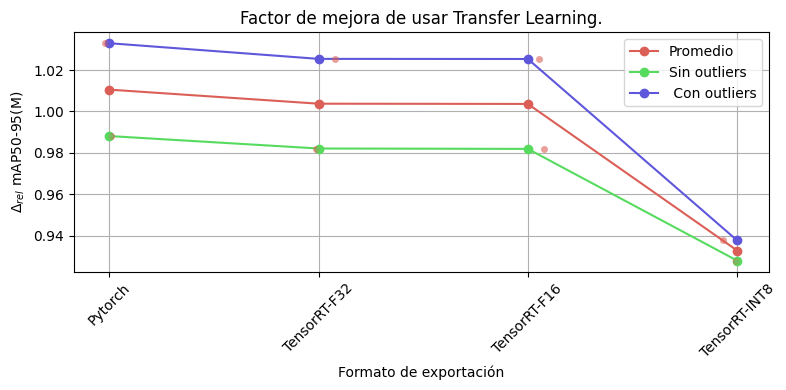

In [53]:
#TODO: Datos importantes!!!
# delta = transfer_learning / Normal
figuras_yolo_TransferLearning_diffm = [plot_metric(**plot_dict_yolo_TransferLearning_diffm[1]), plot_metric(**plot_dict_yolo_TransferLearning_diffm[3]), plot_metric(**plot_dict_yolo_TransferLearning_diffm[5])]

## Conclusiones sobre el efecto de la exportación:
1) A diferencia de lo que se pensaba en un incio, el tamaño del modelo no tiene mucho efecto en la caida del rendimiento del mismo al realizarce exportación en TensorRT. Esto puede que se deba a que el dataset es pequeño o quizás sea así en general.
2) Se apreció anteriormente que el optimizador si afecta en la caida de rendimiento con exportación con TensorRT, siendo SGD el que menor caida tiene en promedio. Esto se vió antes pero se aclara aquí nuevamente.
3) Se observa que el uso de transfer learning si tiene un efecto en la calidad del modelo al exportarse, siendo los entrenamientos sin transfer learning (sin congelar capas) el que mejores resultados da (menor caida en rendimiento), por ende debiese preferirse el entrenamiento de esta forma.

## Comparar YOLOv8 con YOLOv11

### Tablas comparativas - Caso simple

In [54]:
# Comparación simple (sin diferencias)
df_yolov8 = df_updated.loc[df_updated["Model"].isin(orden_yolov8)].copy()
df_yolo11 = df_updated.loc[df_updated["Model"].isin(orden_yolo11)].copy()

# Reemplazar los valores en la columna "Model"
yolo_sizes = ["YOLOn", "YOLOs", "YOLOm", "YOLOl", "YOLOx"]
mapping_yolov8 = dict(zip(orden_yolov8, yolo_sizes))
mapping_yolo11 = dict(zip(orden_yolo11, yolo_sizes))
df_yolov8["Model"] = df_yolov8["Model"].replace(mapping_yolov8)
df_yolo11["Model"] = df_yolo11["Model"].replace(mapping_yolo11)

# Crear tablas comparativas
extra_conditions_1 = {"Format": ["Pytorch"], "TransferLearning": [False]}
extra_conditions_2 = {"Format": ["Pytorch"], "TransferLearning": [True]}
extra_conditions_3 = {"Format": ["TensorRT-INT8"], "TransferLearning": [False]}
extra_conditions_4 = {"Format": ["TensorRT-INT8"], "TransferLearning": [True]}
mean_yolov8_py_fl, mean_yolov9_py_fl, mean_yolo11_py_fl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_1)
mean_yolov8_py_tl, mean_yolov9_py_tl, mean_yolo11_py_tl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_2)
mean_yolov8_int8_fl, mean_yolov9_int8_fl, mean_yolo11_int8_fl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_3)
mean_yolov8_int8_tl, mean_yolov9_int8_tl, mean_yolo11_int8_tl = crear_tabla_promedios_modelos_yolo(df_updated, extra_conditions_4)

In [55]:
print("Resultados promedios y máximos por modelo. En formato Pytorch e ignorando Transfer Learning")
pd.concat([mean_yolov8_py_fl, pd.DataFrame([mean_yolov8_py_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_py_fl, pd.DataFrame([mean_yolo11_py_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato Pytorch e ignorando Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.966823          0.952549         0.018230   
1   yolov8s-seg         0.973211          0.967653         0.006413   
2   yolov8m-seg         0.980555          0.973372         0.005588   
3   yolov8l-seg         0.979347          0.966752         0.012153   
4   yolov8x-seg         0.980003          0.975399         0.003071   
5        YOLOv8         0.975988          0.967145         0.009091   
6   yolo11n-seg         0.977739          0.962180         0.017831   
7   yolo11s-seg         0.973712          0.967042         0.005551   
8   yolo11m-seg         0.977192          0.971937         0.005176   
9   yolo11l-seg         0.980456          0.972993         0.009384   
10  yolo11x-seg         0.973963          0.966077         0.010163   
11      YOLOv11         0.976612          0.968046         0.009621   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.970526       0.963955      0.005173         0.781918   
1       0.977280       0.974353      0.003093         0.822257   
2       0.986299       0.980116      0.004268         0.825671   
3       0.993445       0.982922      0.016504         0.837653   
4       0.981365       0.979097      0.002367         0.844794   
5       0.981783       0.976088      0.006281         0.822459   
6       0.986695       0.980825      0.005082         0.799653   
7       0.991558       0.979274      0.010264         0.823575   
8       0.989218       0.984245      0.006782         0.840589   
9       0.984634       0.982127      0.002333         0.830353   
10      0.985225       0.978973      0.006151         0.853901   
11      0.987466       0.981089      0.006122         0.829614   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.773198         0.009754  
1           0.810006         0.012148  
2           0.819731         0.006913  
3           0.826115         0.016791  
4           0.829892         0.013050  
5           0.811789         0.011731  
6           0.782410         0.015727  
7           0.804202         0.013963  
8           0.816562         0.019701  
9           0.816320         0.016131  
10          0.819381         0.026653  
11          0.807775         0.018435

In [56]:
print("Resultados promedios y máximos por modelo. En formato Pytorch y con Transfer Learning")
pd.concat([mean_yolov8_py_tl, pd.DataFrame([mean_yolov8_py_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_py_tl, pd.DataFrame([mean_yolo11_py_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato Pytorch y con Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.971268          0.961036         0.017365   
1   yolov8s-seg         0.980034          0.977806         0.003211   
2   yolov8m-seg         0.979114          0.974648         0.003017   
3   yolov8l-seg         0.986814          0.980352         0.005416   
4   yolov8x-seg         0.974935          0.969958         0.008286   
5        YOLOv8         0.978433          0.972760         0.007459   
6   yolo11n-seg         0.966199          0.957238         0.007599   
7   yolo11s-seg         0.973215          0.969925         0.003288   
8   yolo11m-seg         0.986907          0.972939         0.015022   
9   yolo11l-seg         0.977887          0.975129         0.001888   
10  yolo11x-seg         0.980251          0.974258         0.004172   
11      YOLOv11         0.976892          0.969898         0.006394   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.972636       0.967643      0.006805         0.751958   
1       0.989500       0.985497      0.003932         0.809312   
2       0.989725       0.987603      0.001748         0.822626   
3       0.990080       0.988679      0.001859         0.833795   
4       0.992228       0.988868      0.002648         0.829845   
5       0.986834       0.983658      0.003398         0.809507   
6       0.977591       0.975668      0.002009         0.745814   
7       0.981729       0.973530      0.009334         0.788573   
8       0.982804       0.980458      0.002465         0.833973   
9       0.983512       0.981311      0.003106         0.830106   
10      0.981143       0.977299      0.005167         0.822255   
11      0.981356       0.977653      0.004416         0.804144   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.742561         0.008402  
1           0.798236         0.007560  
2           0.811046         0.009079  
3           0.820902         0.009143  
4           0.824218         0.006270  
5           0.799393         0.008091  
6           0.738892         0.004920  
7           0.779715         0.007186  
8           0.811717         0.015420  
9           0.812738         0.015739  
10          0.816475         0.008599  
11          0.791907         0.010373

In [57]:
print("Resultados promedios y máximos por modelo. En formato TensorRT-INT8 e ignorando Transfer Learning")
pd.concat([mean_yolov8_int8_fl, pd.DataFrame([mean_yolov8_int8_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_int8_fl, pd.DataFrame([mean_yolo11_int8_fl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato TensorRT-INT8 e ignorando Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.934029          0.901715         0.042289   
1   yolov8s-seg         0.952675          0.932410         0.021221   
2   yolov8m-seg         0.960333          0.920608         0.031202   
3   yolov8l-seg         0.945200          0.885231         0.041964   
4   yolov8x-seg         0.959512          0.913638         0.044388   
5        YOLOv8         0.950350          0.910720         0.036213   
6   yolo11n-seg         0.919832          0.811767         0.137513   
7   yolo11s-seg         0.950600          0.942853         0.007327   
8   yolo11m-seg         0.951578          0.905801         0.061317   
9   yolo11l-seg         0.959886          0.904232         0.084279   
10  yolo11x-seg         0.973759          0.898886         0.080212   
11      YOLOv11         0.951131          0.892708         0.074130   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.941308       0.929323      0.009206         0.718378   
1       0.961118       0.946348      0.017430         0.784397   
2       0.970707       0.941410      0.026059         0.802250   
3       0.966893       0.930649      0.031268         0.793966   
4       0.964815       0.929474      0.041905         0.820887   
5       0.960968       0.935441      0.025174         0.783976   
6       0.949198       0.814573      0.167636         0.722121   
7       0.974726       0.955850      0.012880         0.791406   
8       0.943963       0.915218      0.037718         0.775238   
9       0.964131       0.932028      0.049333         0.799014   
10      0.970807       0.933637      0.037402         0.811297   
11      0.960565       0.910261      0.060994         0.779815   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.714473         0.003944  
1           0.762913         0.026495  
2           0.784006         0.015620  
3           0.768530         0.032403  
4           0.767408         0.054644  
5           0.759466         0.026621  
6           0.611773         0.143795  
7           0.774347         0.014781  
8           0.733292         0.047182  
9           0.761885         0.053212  
10          0.769608         0.048462  
11          0.730181         0.061487

In [58]:
print("Resultados promedios y máximos por modelo. En formato TensorRT-INT8 y con Transfer Learning")
pd.concat([mean_yolov8_int8_tl, pd.DataFrame([mean_yolov8_int8_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv8"),
           mean_yolo11_int8_tl, pd.DataFrame([mean_yolo11_int8_tl.select_dtypes(include='number').mean()]).assign(Model="YOLOv11")]).reset_index(drop=True)

Resultados promedios y máximos por modelo. En formato TensorRT-INT8 y con Transfer Learning


Model  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0   yolov8n-seg         0.773719          0.753628         0.028479   
1   yolov8s-seg         0.978876          0.949187         0.027501   
2   yolov8m-seg         0.964615          0.946238         0.014507   
3   yolov8l-seg         0.953008          0.943767         0.010507   
4   yolov8x-seg         0.951989          0.945507         0.007417   
5        YOLOv8         0.924442          0.907666         0.017682   
6   yolo11n-seg         0.759267          0.725838         0.055959   
7   yolo11s-seg         0.933377          0.912520         0.020773   
8   yolo11m-seg         0.799492          0.730926         0.095254   
9   yolo11l-seg         0.906638          0.862197         0.044698   
10  yolo11x-seg         0.980014          0.947969         0.022329   
11      YOLOv11         0.875758          0.835890         0.047803   

    mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0       0.839426       0.746373      0.062925         0.563168   
1       0.974725       0.962540      0.016506         0.777575   
2       0.971965       0.955967      0.011549         0.772507   
3       0.989620       0.980100      0.009668         0.796970   
4       0.986149       0.973754      0.008509         0.790944   
5       0.952377       0.923747      0.021831         0.740233   
6       0.812421       0.749613      0.070522         0.556784   
7       0.945681       0.941158      0.004994         0.744133   
8       0.810834       0.752417      0.078676         0.618944   
9       0.914780       0.892967      0.029309         0.704531   
10      0.977543       0.969493      0.007801         0.805106   
11      0.892252       0.861130      0.038261         0.685900   

    mAP50-95(M)_mean  mAP50-95(M)_std  
0           0.495752         0.047417  
1           0.730333         0.045816  
2           0.754376         0.025421  
3           0.787048         0.010391  
4           0.782299         0.008172  
5           0.709962         0.027444  
6           0.510214         0.048366  
7           0.715754         0.025046  
8           0.536786         0.089056  
9           0.667801         0.038298  
10          0.786215         0.024825  
11          0.643354         0.045118

### Tablas comparativas - Por factor de mejora

In [59]:
# Parametros para comparar
columna = "Model"
opciones = [True, False]
casos_a_comparar_1 = ["yolov8n-seg", "yolo11n-seg"]
casos_a_comparar_2 = ["yolov8s-seg", "yolo11s-seg"]
casos_a_comparar_3 = ["yolov8m-seg", "yolo11m-seg"]
casos_a_comparar_4 = ["yolov8l-seg", "yolo11l-seg"]
casos_a_comparar_5 = ["yolov8x-seg", "yolo11x-seg"]

# Comparar por Modelo
resultados_yolon_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_1)
resultados_yolos_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_2)
resultados_yolom_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_3)
resultados_yolol_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_4)
resultados_yolox_fl = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar_5)

mean_diff_yolon_fl, mean_diff_r_yolon_fl, mean_diff_m_yolon_fl, mean_diff_re_yolon_fl = crear_datagramas_filtrados(resultados_yolon_fl, "TransferLearning", opciones)
mean_diff_yolos_fl, mean_diff_r_yolos_fl, mean_diff_m_yolos_fl, mean_diff_re_yolos_fl = crear_datagramas_filtrados(resultados_yolos_fl, "TransferLearning", opciones)
mean_diff_yolom_fl, mean_diff_r_yolom_fl, mean_diff_m_yolom_fl, mean_diff_re_yolom_fl = crear_datagramas_filtrados(resultados_yolom_fl, "TransferLearning", opciones)
mean_diff_yolol_fl, mean_diff_r_yolol_fl, mean_diff_m_yolol_fl, mean_diff_re_yolol_fl = crear_datagramas_filtrados(resultados_yolol_fl, "TransferLearning", opciones)
mean_diff_yolox_fl, mean_diff_r_yolox_fl, mean_diff_m_yolox_fl, mean_diff_re_yolox_fl = crear_datagramas_filtrados(resultados_yolox_fl, "TransferLearning", opciones)

# Juntar en tablas comparativas
comparison_yolov8_to_yolo11 = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, "Todos")
comparison_yolov8_to_yolo11_fl = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, False)
comparison_yolov8_to_yolo11_tl = crear_tabla_comparativa_para_modelos_yolo(mean_diff_m_yolon_fl, mean_diff_m_yolos_fl, mean_diff_m_yolom_fl, mean_diff_m_yolol_fl, mean_diff_m_yolox_fl, True)

In [60]:
print("Mejora relativa entre YOLOv8 y YOLOv11")
comparison_yolov8_to_yolo11

Mejora relativa entre YOLOv8 y YOLOv11


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.987414  0.996281     0.989640  0.986640    0.928610   1.208578   
1     0.993847  0.994854     0.987953  0.982704    1.082618   0.985000   
2     0.978965  0.979062     0.965947  0.964237    1.003707   1.022675   
3     0.992515  0.987286     0.971955  0.974045    1.089346   0.837310   
4     0.997267  0.996486     0.995918  0.997443    0.971584   0.945224   

   postprocess  Model  
0     1.059743  YOLOn  
1     0.976114  YOLOs  
2     0.997265  YOLOm  
3     1.085582  YOLOl  
4     1.056206  YOLOx

In [61]:
print("Mejora relativa entre YOLOv8 y YOLOv11 (sin Transfer Learning)")
comparison_yolov8_to_yolo11_fl

Mejora relativa entre YOLOv8 y YOLOv11 (sin Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.981665  0.980811     0.970931  0.966745    0.798579   1.254578   
1     1.004563  1.006602     0.999740  0.989472    1.106644   0.971878   
2     0.996378  0.995789     0.979476  0.978976    0.964023   1.017223   
3     1.008782  1.001417     0.992114  0.989925    1.163039   0.832835   
4     0.991501  1.001928     0.996226  0.997324    1.011652   0.942306   

   postprocess  Model  
0     0.915262  YOLOn  
1     1.017108  YOLOs  
2     0.997835  YOLOm  
3     1.136831  YOLOl  
4     1.174022  YOLOx

In [62]:
print("Mejora relativa entre YOLOv8 y YOLOv11 (con Transfer Learning)")
comparison_yolov8_to_yolo11_tl

Mejora relativa entre YOLOv8 y YOLOv11 (con Transfer Learning)


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness  preprocess  inference  \
0     0.993162  1.011751     1.008349  1.006534    1.058640   1.162578   
1     0.983130  0.983107     0.976166  0.975937    1.058592   0.998121   
2     0.960391  0.961220     0.951516  0.948515    1.046038   1.028491   
3     0.976248  0.973155     0.951796  0.958166    1.015653   0.841784   
4     1.003033  0.991044     0.995611  0.997561    0.931516   0.948143   

   postprocess  Model  
0     1.204224  YOLOn  
1     0.935120  YOLOs  
2     0.996657  YOLOm  
3     1.034333  YOLOl  
4     0.938390  YOLOx

### Con gráficos - Comparación simple

#### Todos los casos

In [63]:
datagrama_cualquiera = [df_yolov8]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["YOLOv8"]
labels = ["YOLOv8", "YOLOv11"]
xlabel = "Modelo"
ylabel = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
order = yolo_sizes

title = "YOLOv8 vs YOLOv11"
datagramas_yolov8_yolo11 = [df_yolov8, df_yolo11]
plot_dict_yolo8vs11 = crear_lista_diccionarios(datagrama_cualquiera, datagramas_yolov8_yolo11, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

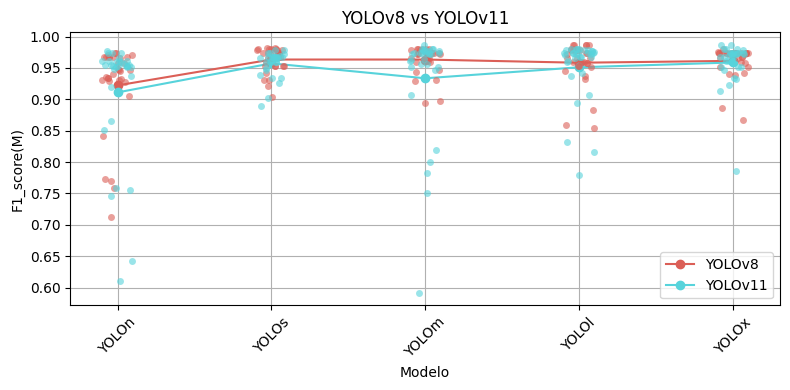

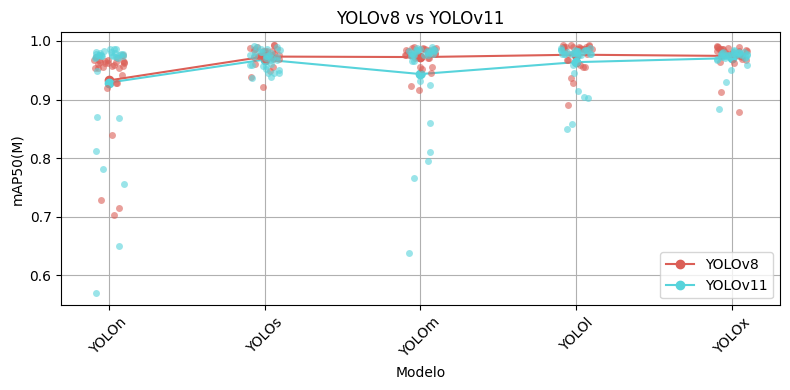

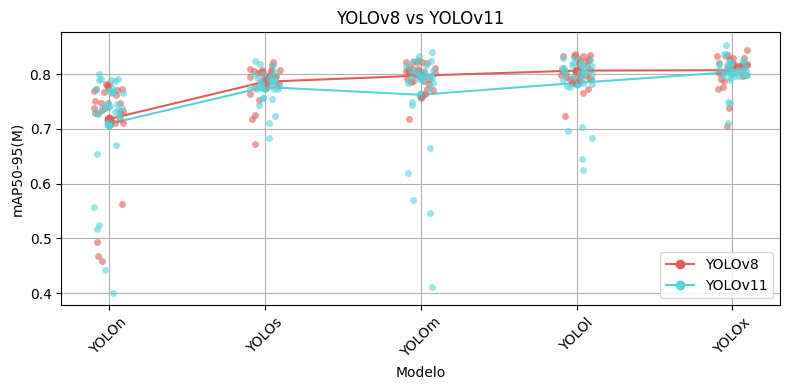

In [64]:
#TODO: Datos importantes!!!
figuras_yolov8vs11 = [plot_metric(**plot_dict_yolo8vs11[1]), plot_metric(**plot_dict_yolo8vs11[3]), plot_metric(**plot_dict_yolo8vs11[5])]

In [65]:
df_yolov8_to_show = df_yolov8.loc[(df_yolov8["TransferLearning"]==False) & (df_yolov8["Format"]=="TensorRT-INT8")]
df_yolo11_to_show = df_yolo11.loc[(df_yolo11["TransferLearning"]==False) & (df_yolo11["Format"]=="TensorRT-INT8")]

title = "YOLOv8 vs YOLOv11 (Sin Transfer Learning y con exportación INT8)"
datagramas_yolov8_yolo11 = [df_yolov8_to_show, df_yolo11_to_show]
plot_dict_yolo8vs11_fl = crear_lista_diccionarios(datagrama_cualquiera, datagramas_yolov8_yolo11, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

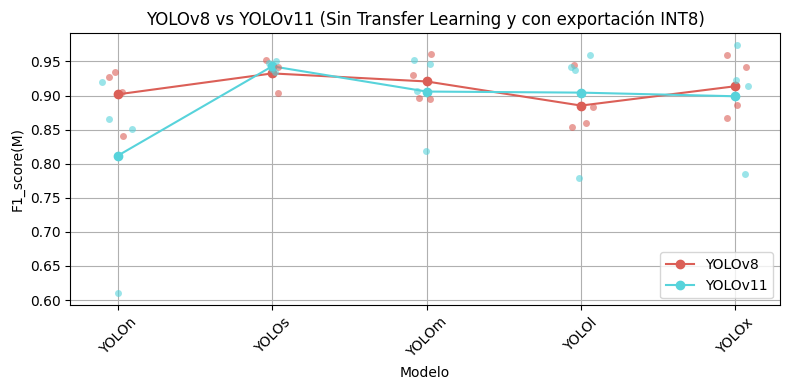

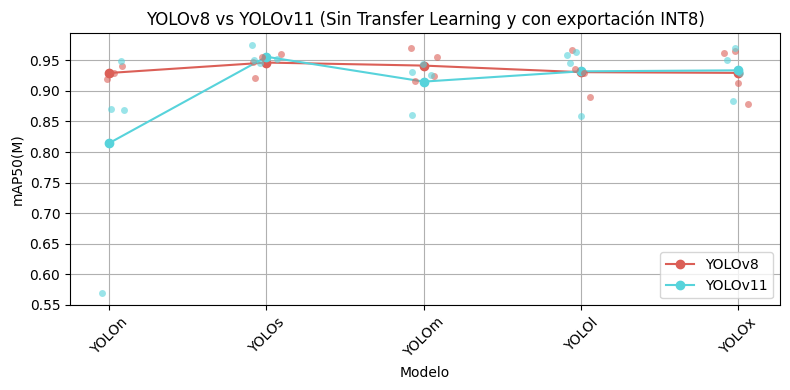

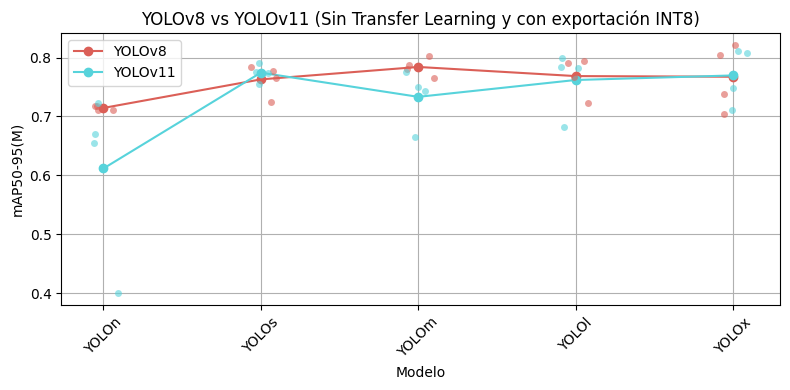

In [66]:
#TODO: Datos importantes!!!
figuras_yolov8vs11_fl = [plot_metric(**plot_dict_yolo8vs11_fl[1]), plot_metric(**plot_dict_yolo8vs11_fl[3]), plot_metric(**plot_dict_yolo8vs11_fl[5])]

### Con gráficos - Comparación factor de mejora

In [67]:
datagram_todos = [comparison_yolov8_to_yolo11]
datagramas_casos = [comparison_yolov8_to_yolo11, comparison_yolov8_to_yolo11_fl, comparison_yolov8_to_yolo11_tl]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio", "Con Transfer Learning", "Sin Transfer Learning"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora de YOLOv8 a YOLOv11."
order = yolo_sizes

plot_dict_diff_yolo8vs11 = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

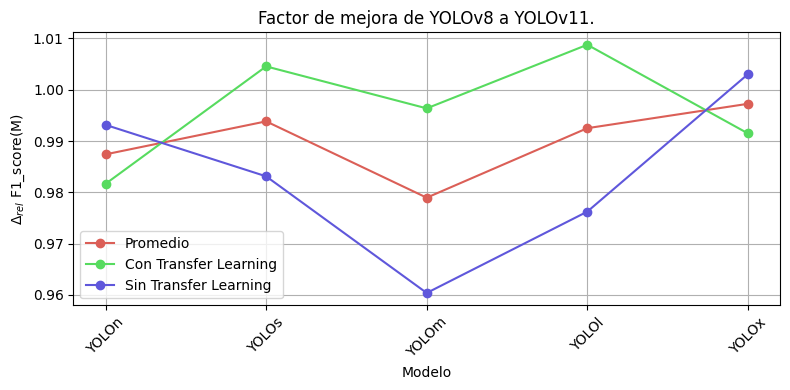

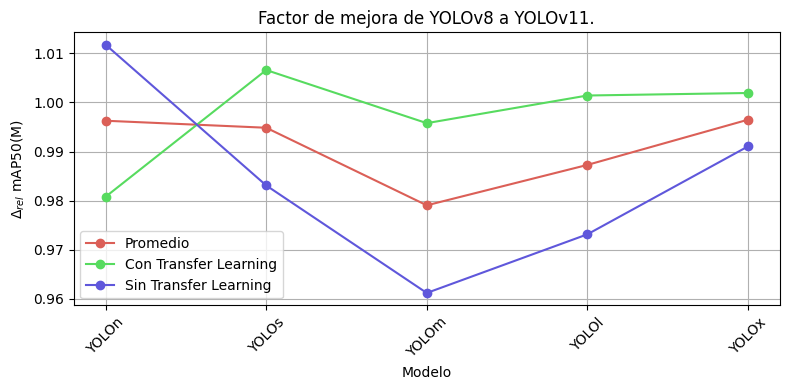

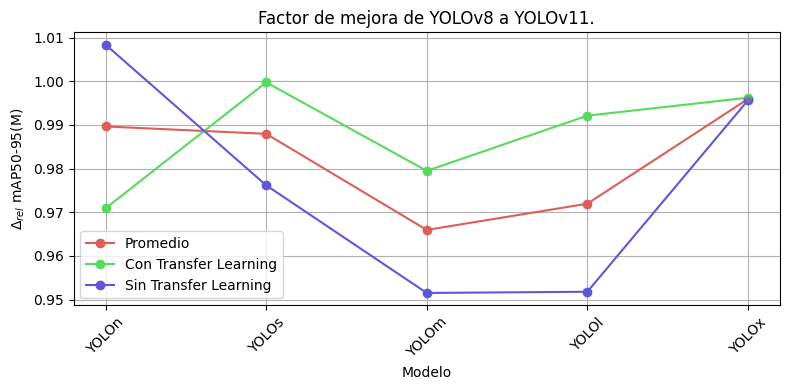

In [68]:
#TODO: Datos importantes!!!
# delta = (YOLOv11 - YOLOv8) / YOLOv11
figuras_diff_yolov8vs11 = [plot_metric(**plot_dict_diff_yolo8vs11[1]), plot_metric(**plot_dict_diff_yolo8vs11[3]), plot_metric(**plot_dict_diff_yolo8vs11[5])]

## Conclusiones de la comparación enter YOLOv8 y YOLOv11:
1. YOLOv8 es en promedio ligeramente mejor que YOLOv11, pero no siempre.
2. Parece ser que el entrenamiento con modelos medianos y grandes son ligeramente mejores pero estos tienen más caida de rendimiento al realizar exportación en TensoRT-INT8.

## Comparación según Dataset (Labels Only vs con imagenes de fondo)

### Tablas comparativas - caso simple

In [69]:
# Crear tablas comparativas
extra_conditions_1 = {"Format": ["Pytorch"]}
extra_conditions_2 = {"Format": ["TensorRT-INT8"]}
datasets_mean_py = crear_tabla_promedios_dataset(df_updated, ["Deepfish", "Deepfish_LO"], extra_conditions_1)
datasets_mean_int8 = crear_tabla_promedios_dataset(df_updated, ["Deepfish", "Deepfish_LO"], extra_conditions_2)

In [70]:
# TODO: Datos Importantes!!
print("Resultados promedios y máximos según versión del Dataset.")
pd.concat([datasets_mean_py.assign(Format="Pytorch"), datasets_mean_int8.assign(Format="TensorRT-INT8")]).reset_index(drop=True)

Resultados promedios y máximos según versión del Dataset.


Dataset  F1_score(M)_max  F1_score(M)_mean  F1_score(M)_std  \
0     Deepfish         0.991344          0.970418         0.009953   
1  Deepfish_LO         0.986907          0.959847         0.064074   
2     Deepfish         0.978876          0.875397         0.123354   
3  Deepfish_LO         0.980014          0.843591         0.167792   

   mAP50(M)_max  mAP50(M)_mean  mAP50(M)_std  mAP50-95(M)_max  \
0      0.994753       0.980219      0.009104         0.853901   
1      0.993445       0.970135      0.071104         0.844794   
2      0.989620       0.897609      0.113140         0.820887   
3      0.984133       0.862165      0.182354         0.807764   

   mAP50-95(M)_mean  mAP50-95(M)_std         Format  
0          0.805987         0.030241        Pytorch  
1          0.791847         0.083133        Pytorch  
2          0.709182         0.120049  TensorRT-INT8  
3          0.666802         0.167375  TensorRT-INT8

### Tablas comparativas - mejora relativa

In [71]:
# Parametros para comparar
columna = "Dataset"
casos_a_comparar = ["Deepfish_LO", "Deepfish"]
opciones_1 = [True, False]
opciones_2 = ["Pytorch",  "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]
opciones_3 = models_by_size

# Comparar por Dataset
resultados_dataset = comparar_metricas(datagrama=df_updated, columna=columna, casos_a_comparar=casos_a_comparar)
resultados_dataset_fl = comparar_metricas(datagrama=df_fl, columna=columna, casos_a_comparar=casos_a_comparar)
resultados_dataset_tl = comparar_metricas(datagrama=df_tl, columna=columna, casos_a_comparar=casos_a_comparar)

# Separar por diferentes casos
mean_diff_dataset_by_tl, mean_diff_r_dataset_by_tl, mean_diff_m_dataset_by_tl, mean_diff_re_dataset_by_tl = crear_datagramas_filtrados(resultados_dataset, "TransferLearning", opciones_1)
mean_diff_dataset_by_format, mean_diff_r_dataset_by_format, mean_diff_m_dataset_by_format, mean_diff_re_dataset_by_format = crear_datagramas_filtrados(resultados_dataset, "Format", opciones_2)
mean_diff_dataset_by_model, mean_diff_r_dataset_by_model, mean_diff_m_dataset_by_model, mean_diff_re_dataset_by_model = crear_datagramas_filtrados(resultados_dataset, "Model", opciones_3)


In [72]:
print("Mejora relativa del Dataset con imagenes de fondo, según uso de Transfer Learning.")
mean_diff_m_dataset_by_tl.loc[mean_diff_m_dataset_by_tl["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "TransferLearning"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según uso de Transfer Learning.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness TransferLearning
0     1.007177  1.005753     1.017035  1.011502             True
1     1.013040  1.008481     1.013679  1.012417            False
2     1.010093  1.007110     1.015366  1.011957            Todos

In [73]:
# TODO: Resultados Importantes
print("Mejora relativa del Dataset con imagenes de fondo, según formato de exportación.")
mean_diff_m_dataset_by_format.loc[mean_diff_m_dataset_by_format["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Format"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según formato de exportación.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness         Format
0     1.002497  1.000383     1.005384  1.002428        Pytorch
1     1.002634  1.000626     1.003173  1.000069   TensorRT-F32
2     1.002719  1.000614     1.002915  1.000048   TensorRT-F16
3     1.034050  1.028158     1.052354  1.047554  TensorRT-INT8
4     1.010093  1.007110     1.015366  1.011957          Todos

In [74]:
# TODO: Resultados Importantes
print("Mejora relativa del Dataset con imagenes de fondo, según el modelo.")
mean_diff_m_dataset_by_model.loc[mean_diff_m_dataset_by_model["Outlier"]==False,["F1_score(M)", "mAP50(M)", "mAP50-95(M)", "fitness", "Model"]].reset_index(drop=True)

Mejora relativa del Dataset con imagenes de fondo, según el modelo.


F1_score(M)  mAP50(M)  mAP50-95(M)   fitness        Model
0      1.031997  1.037910     1.047113  1.040121  yolo11n-seg
1      1.035803  1.014060     1.016982  1.014208  yolov8n-seg
2      0.993440  0.985146     0.994686  0.985598  yolo11s-seg
3      1.009829  1.006209     1.017499  1.009707  yolov8s-seg
4      1.015479  1.013459     1.026629  1.020732  yolo11m-seg
5      0.994692  0.999929     1.007808  1.004910  yolov8m-seg
6      1.027096  1.015316     1.033245  1.040772  yolov9c-seg
7      1.010582  1.012976     1.024967  1.020807  yolo11l-seg
8      0.990465  0.988317     0.998920  0.995379  yolov8l-seg
9      1.008571  1.011124     1.017361  1.013643  yolov9e-seg
10     1.003489  1.006284     1.012529  1.014143  yolo11x-seg
11     1.001750  0.997011     0.990093  0.988034  yolov8x-seg
12     1.010093  1.007110     1.015366  1.011957        Todos

### Con gráficos - Comparación simple

In [75]:
datagram_todos = [df_updated]
datagramas_casos = [df_updated[df_updated["Dataset"]=="Deepfish"], df_updated[df_updated["Dataset"]=="Deepfish_LO"]]
group = ["Model"]
groups = ["Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Con imagenes de fondo", "Sin imagenes de fondo"]
xlabel = "Modelo"
ylabel = [r"F1_score(M)", r"mAP50(M)", r"mAP50-95(M)"]
title = "Modelos entrenados con datasets con y sin imagenes de fondo"
order = models_by_size

plot_dict_datasets = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

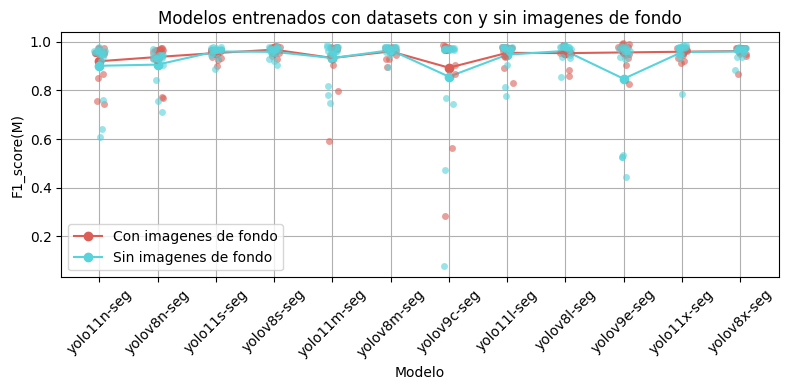

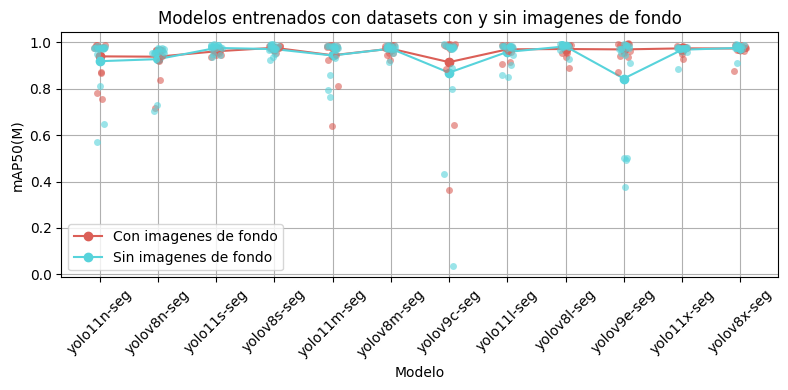

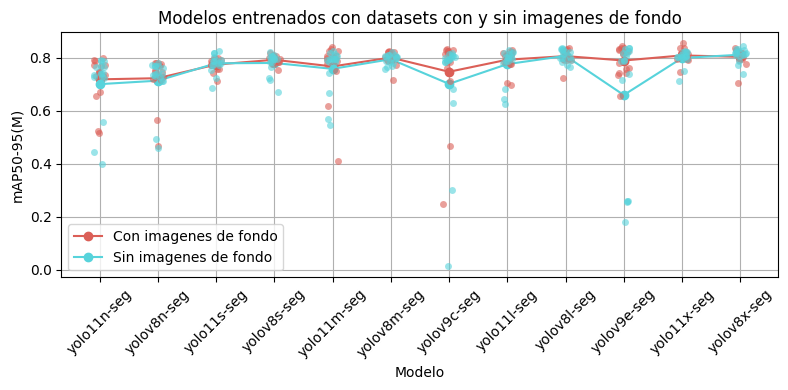

In [76]:
figuras_datasets = [plot_metric(**plot_dict_datasets[1]), plot_metric(**plot_dict_datasets[3]), plot_metric(**plot_dict_datasets[5])]

### Con gráficos - Comparación factor de mejora

In [77]:
datagram_todos = [mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==False]]
datagramas_casos = [mean_diff_m_dataset_by_model, mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==True], mean_diff_m_dataset_by_model[mean_diff_m_dataset_by_model["Outlier"]==False]]
group = ["Model"]
groups = ["Model", "Model", "Model"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio","Incluyendo Outliers", "Sin incluir Outliers"]
xlabel = "Modelo"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora al añadir imagenes de fondo"
order = models_by_size

plot_dict_datasets_diff_model = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title, False)

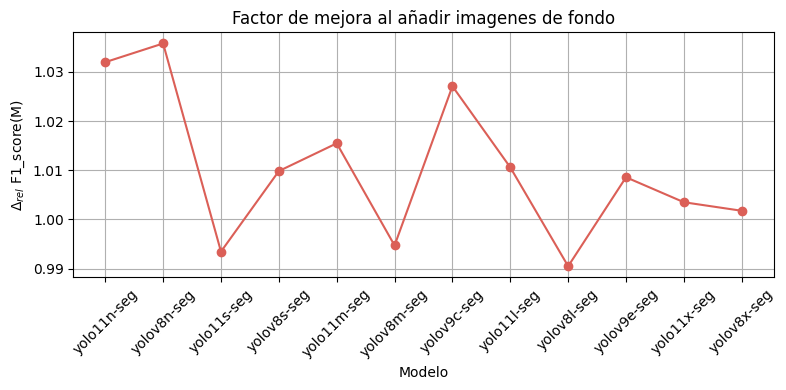

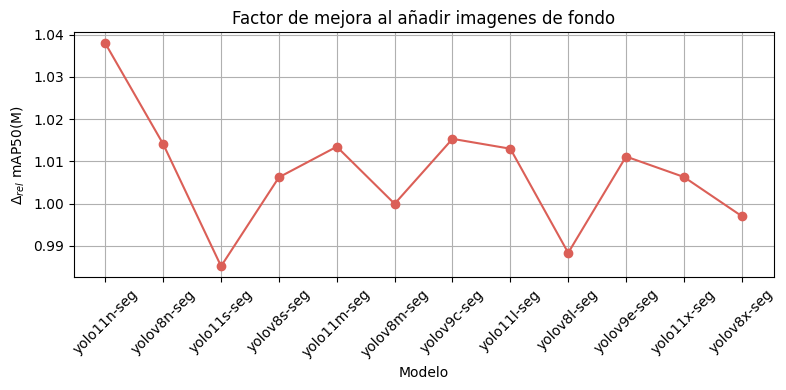

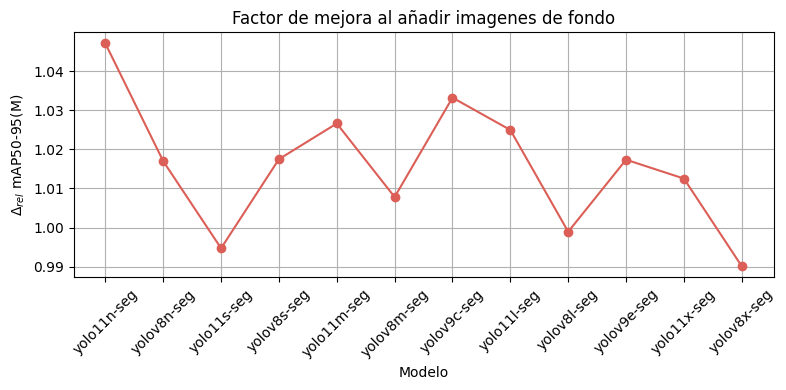

In [78]:
figuras_datasets_diff_model = [plot_metric(**plot_dict_datasets_diff_model[0]), plot_metric(**plot_dict_datasets_diff_model[2]), plot_metric(**plot_dict_datasets_diff_model[4])]

In [79]:
datagram_todos = [mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==False]]
datagramas_casos = [mean_diff_m_dataset_by_format, mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==True], mean_diff_m_dataset_by_format[mean_diff_m_dataset_by_format["Outlier"]==False]]
group = ["Format"]
groups = ["Format", "Format", "Format"]
metrics = ["F1_score(M)", "mAP50(M)", "mAP50-95(M)"]
label = ["Promedio"]
labels = ["Promedio","Incluyendo Outliers", "Sin incluir Outliers"]
xlabel = "Formato de Exportación"
ylabel = [r"$\Delta_{rel}$ F1_score(M)", r"$\Delta_{rel}$ mAP50(M)", r"$\Delta_{rel}$ mAP50-95(M)"]
title = "Factor de mejora al añadir imagenes de fondo"
order = ["Pytorch", "TensorRT-F32", "TensorRT-F16", "TensorRT-INT8"]

plot_dict_datasets_diff_format = crear_lista_diccionarios(datagram_todos, datagramas_casos, group, groups, metrics, label, labels, order, xlabel, ylabel, title)

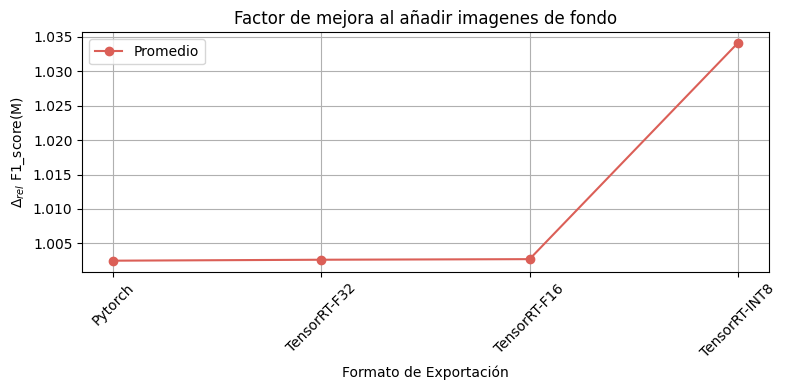

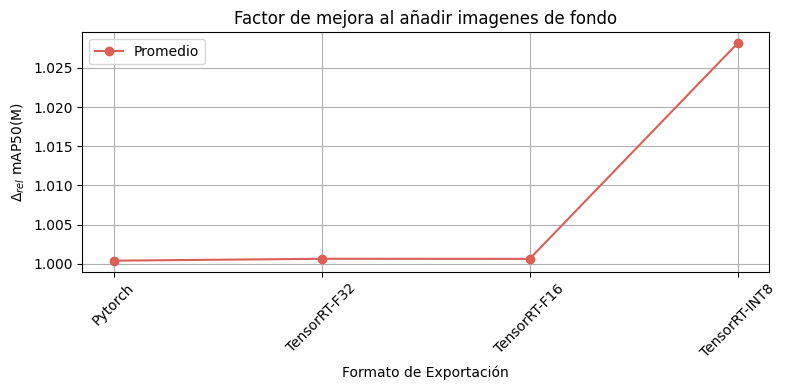

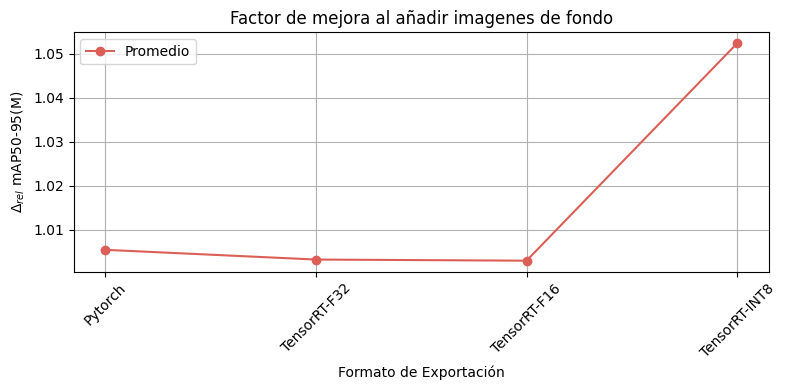

In [80]:
# TODO: IMPORTANTE!!
figuras_datasets_diff_format = [plot_metric(**plot_dict_datasets_diff_format[0]), plot_metric(**plot_dict_datasets_diff_format[2]), plot_metric(**plot_dict_datasets_diff_format[4])]

## Conclusiones sobre el tipo de Dataset:
1) El modelo entrenado con el Dataset que incluye imagenes de fondo (el normal) es consistentemente mejor que el que no tiene imagenes de fondo (Labels Only).
2) La diferencia se hace incluso un poco mayor al realizar la exportación con TensorRT en INT8.

# Conclusiones finales

1) Transfer Learning (TL):
    - Entrenar por TL para este dataset no implica una caida en el rendimiento, es mas, en promedio hacerlo entrega mejor rendimiento que un entrenamiento de todas las capas.
    - Entrenar por TL si implica de forma consistente una caida mayor en el rendimiento del modelo si se va a exportar con TensorRT-INT8.
        - Los modelos entrenados con TL al tener una mayor caida de remdimiento al exportar a TensorRT-INT8, incluso si empiezan mejor suelen en promedio terminar igual o peor que un modelo entrenado sin TL.
        - Esto puede significar que si se tienen modelos iguales pre exportación, debiesen preferirse los entrenados sin TL. Se espera que esta situación ocurra al realizar una búsqueda de hiperparámetros, pues se utilizará solo el mejor de todos los casos.
2) Optimizador:
    - En promedio pero de forma consistente entrenar con SGD da mejores resultados que entrenar con AdamW.
    - AdamW tiene una mayor tendencia a realizar entrenamientos fallidos o divergentes.
    - AdamW tiene mayor sensibilidad a la taza de entrenamiento inicial y es muy fácil que diverga.
    - Los modelos entrenados con AdamW suelen tener una caida relativa mayor en su rendimiento al exportación con cuantización númerica INT8.
3) Efecto del tamaño del modelo (tamaño del archivo y número de parámetros):
    - Observando las métricas F1_Score y mAP50 indica que aumentar el tamaño del modelo no tiene un efectos positivos apreciables en el rendimiento de los modelos entrenados.
        - Es posible que esto se deba a que el dataset Deepfish es muy pequeño y simple y por lo tanto se llega a una cota superior de rendimiento que no se mejora con simplemente hacer el modelo más grande.
    - Para métricas más exigentes que las comunes, como lo es mAP50-95, un mayor tamaño de modelo si corresponde consistentemente con a un mejor rendimiento.
    - La caida de rendimiento al realizar cuantización númerica INT8 no parece ser muy afectada por el tamaño del modelo, solo si es muy pequeño (caso "n") y para algunos casos específicos como "yolo11m" y "yolov9c".
4) Comparación entre modelos:
    - Se observó que YOLOv8 es ligeramente superior a YOLOv11.
    - YOLOv9c es consistentemente el peor al momento de exportarse con TensorRT-INT8.
5) Datasets:
    - Los modelos entrenados con un Dataset que incluye imagenes de fondo (caso normal) muestra mejor rendimiento que el entrenado solo con imagenes con instancias etiquetadas (Labels Only).

---
## Resolución
Realizar busqueda de hiperparámetros para modelos YOLOv8 (s, m, l, x),  YOLOv11 (s, m, l, x) y YOLOv9e; dataset normal; optimizador SGD; sin transfer learning.